# Star Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [643]:
# this is a comprehensive list of dependencies in order to run linear regression and classification. 
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
##!pip install -U scikit-learn --user


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    

)
sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, )

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [644]:
# Loading the data
df = pd.read_csv("shg.csv")

<IPython.core.display.Javascript object>

In [645]:
# Make a backup copy
dataz = df.copy()

<IPython.core.display.Javascript object>

In [646]:
# Initial look at the data
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1        277   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2019              7            13              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               89.10   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       2       Canceled

<IPython.core.display.Javascript object>

In [647]:
# End of the data
df.tail()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
56921             2               1                     0                  1   
56922             2               0                     1                  1   
56923             2               0                     0                  3   
56924             2               0                     2                  2   
56925             2               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
56921       Meal Plan 2                           0        Room_Type 4   
56922       Meal Plan 1                           0        Room_Type 1   
56923      Not Selected                           0        Room_Type 1   
56924      Not Selected                           0        Room_Type 1   
56925       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
56921         45          2019              6            15   
56922        320          2019              5            15   
56923         63          2018              4            21   
56924          6          2019              4            28   
56925        207          2018             12            30   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
56921              Online               0                             0   
56922             Offline               0                             0   
56923              Online               0                             0   
56924              Online               0                             0   
56925             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
56921                                     0              163.88   
56922                                     0               90.00   
56923                                     0               94.50   
56924                                     0              162.50   
56925                                     0              161.67   

       no_of_special_requests booking_status  
56921                       1   Not_Canceled  
56922                       1       Canceled  
56923                       0       Canceled  
56924                       2   Not_Canceled  
56925                       0   Not_Canceled

<IPython.core.display.Javascript object>

In [648]:
# Seeing the data
df.shape

(56926, 18)

<IPython.core.display.Javascript object>

In [649]:
# Seeing the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

Note: Objects in the data will not improve classification and must be treated.

In [650]:
# Let's deal with the objects.
obj_df = df.select_dtypes(include=["object"]).copy()
obj_df.head()

type_of_meal_plan room_type_reserved market_segment_type booking_status
0       Meal Plan 1        Room_Type 1             Offline   Not_Canceled
1      Not Selected        Room_Type 1              Online   Not_Canceled
2       Meal Plan 1        Room_Type 1              Online       Canceled
3       Meal Plan 1        Room_Type 1              Online       Canceled
4      Not Selected        Room_Type 1              Online       Canceled

<IPython.core.display.Javascript object>

In [651]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

In [653]:
df.describe().T

count         mean        std     min  \
no_of_adults                          56926.0     1.875856   0.518667     0.0   
no_of_children                        56926.0     0.110723   0.408885     0.0   
no_of_weekend_nights                  56926.0     0.835840   0.875900     0.0   
no_of_week_nights                     56926.0     2.261901   1.432371     0.0   
required_car_parking_space            56926.0     0.026332   0.160123     0.0   
lead_time                             56926.0    93.713909  92.408296     0.0   
arrival_year                          56926.0  2018.248340   0.644619  2017.0   
arrival_month                         56926.0     6.490215   3.027185     1.0   
arrival_date                          56926.0    15.635913   8.718717     1.0   
repeated_guest                        56926.0     0.024664   0.155099     0.0   
no_of_previous_cancellations          56926.0     0.020939   0.326142     0.0   
no_of_previous_bookings_not_canceled  56926.0     0.167902   1.943647     0.0   
avg_price_per_room                    56926.0   109.610570  38.256075     0.0   
no_of_special_requests                56926.0     0.666040   0.814257     0.0   

                                         25%     50%     75%     max  
no_of_adults                             2.0     2.0     2.0     4.0  
no_of_children                           0.0     0.0     0.0    10.0  
no_of_weekend_nights                     0.0     1.0     2.0     8.0  
no_of_week_nights                        1.0     2.0     3.0    17.0  
required_car_parking_space               0.0     0.0     0.0     1.0  
lead_time                               21.0    65.0   142.0   521.0  
arrival_year                          2018.0  2018.0  2019.0  2019.0  
arrival_month                            4.0     6.0     9.0    12.0  
arrival_date                             8.0    16.0    23.0    31.0  
repeated_guest                           0.0     0.0     0.0     1.0  
no_of_previous_cancellations             0.0     0.0     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.0     0.0    72.0  
avg_price_per_room                      85.0   105.0   129.7   540.0  
no_of_special_requests                   0.0     0.0     1.0     5.0

<IPython.core.display.Javascript object>

In [654]:
# fixed the objects but now I only have 5 in my data count. Have to fix this properly. Note: I fixed this error.

<IPython.core.display.Javascript object>

## Data Overview

- Observations:
- Sanity checks:

In [655]:
df.isnull().sum().sort_values(
    ascending=False
)  # sorts each column by greatest number of missing values. No missing values.

no_of_adults                            0
no_of_children                          0
no_of_special_requests                  0
avg_price_per_room                      0
no_of_previous_bookings_not_canceled    0
no_of_previous_cancellations            0
repeated_guest                          0
market_segment_type                     0
arrival_date                            0
arrival_month                           0
arrival_year                            0
lead_time                               0
room_type_reserved                      0
required_car_parking_space              0
type_of_meal_plan                       0
no_of_week_nights                       0
no_of_weekend_nights                    0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

In [656]:
# filtering object type columns; 4 object types.
cat_columns = df.describe(include=["object"]).columns
cat_columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

<IPython.core.display.Javascript object>

In [657]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in type_of_meal_plan are :
Meal Plan 1     42330
Not Selected    10072
Meal Plan 2      4516
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
**************************************************
Unique values in room_type_reserved are :
Room_Type 1    42807
Room_Type 4    10413
Room_Type 6     1581
Room_Type 5      983
Room_Type 2      823
Room_Type 7      312
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Unique values in market_segment_type are :
Online           39490
Offline          13875
Corporate         2796
Complementary      536
Aviation           229
Name: market_segment_type, dtype: int64
**************************************************
Unique values in booking_status are :
Not_Canceled    35378
Canceled        21548
Name: booking_status, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

In [658]:
df = df.drop_duplicates(keep="first")

<IPython.core.display.Javascript object>

In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

## Observations from initial data view
1. Data has 18 Columns and 56,926 entries 
2. There are no null entries
3. Our dependent variable: booking_status has high volume of cancellations
4. Four data fields are object data type
5. I discovered later that there are duplicate values; these will be dealt with
6. 42576 rows of unique data

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

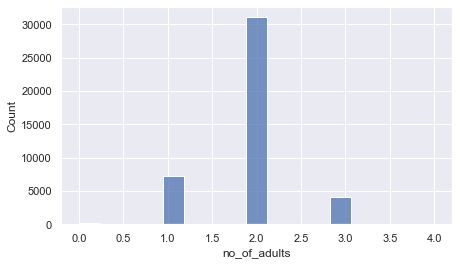

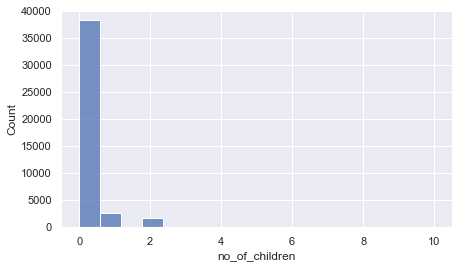

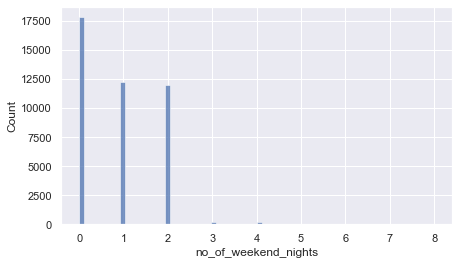

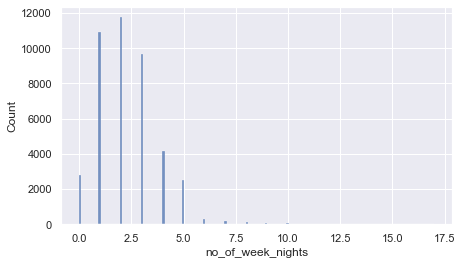

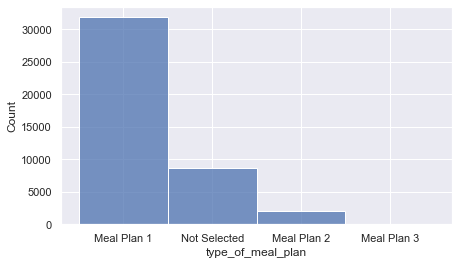

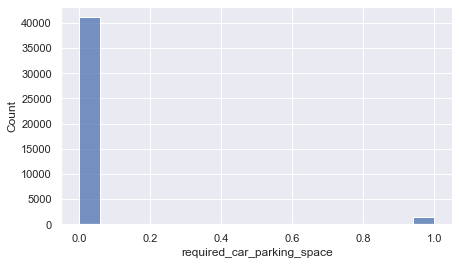

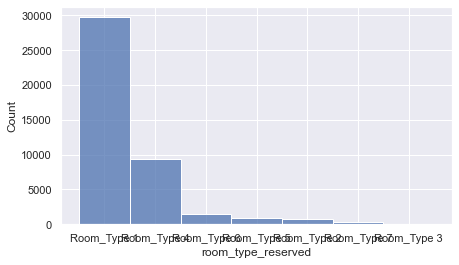

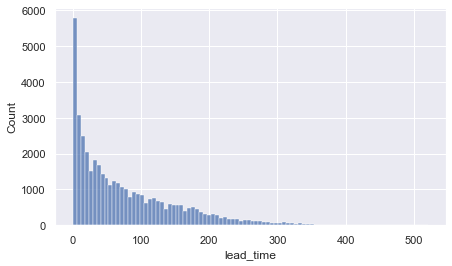

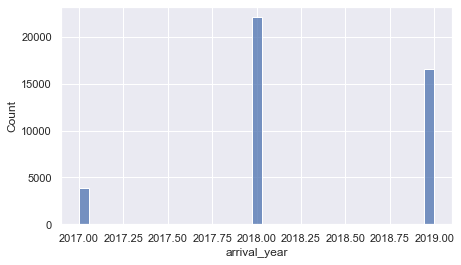

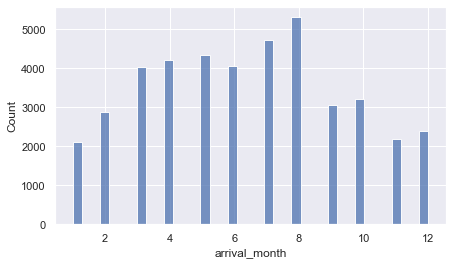

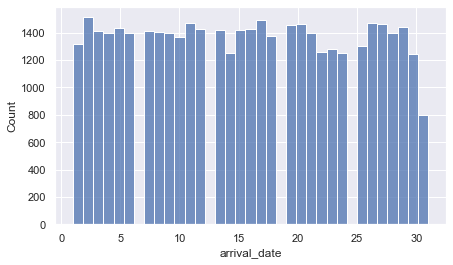

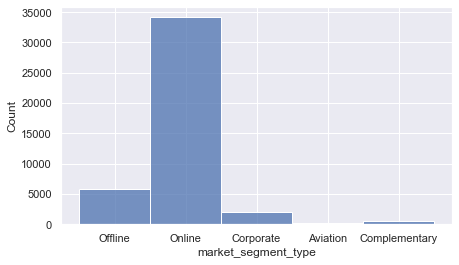

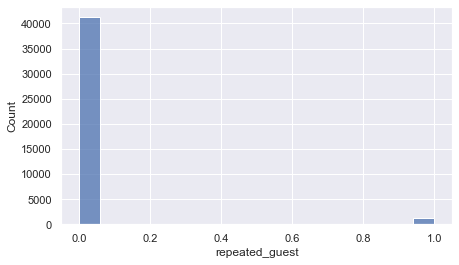

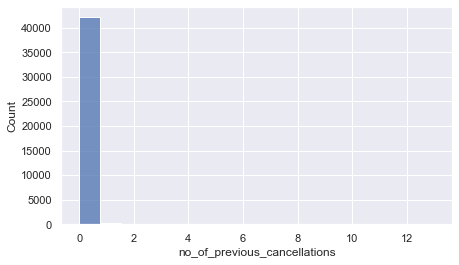

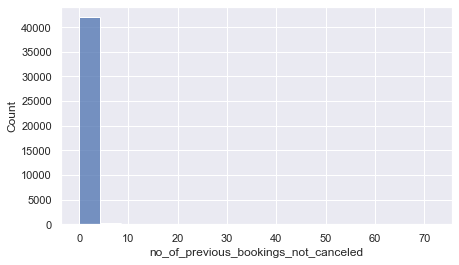

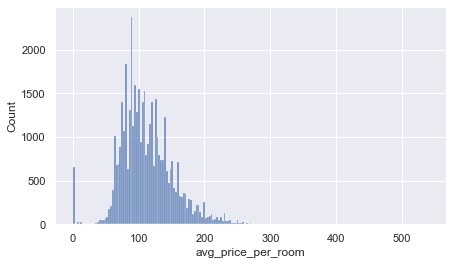

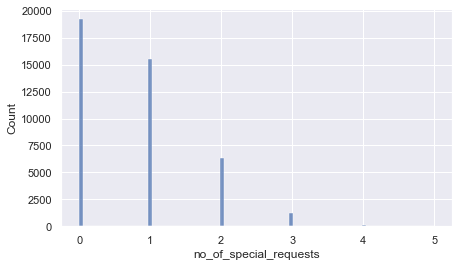

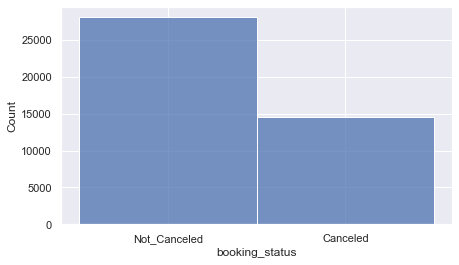

<IPython.core.display.Javascript object>

In [660]:
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i)
    plt.show()

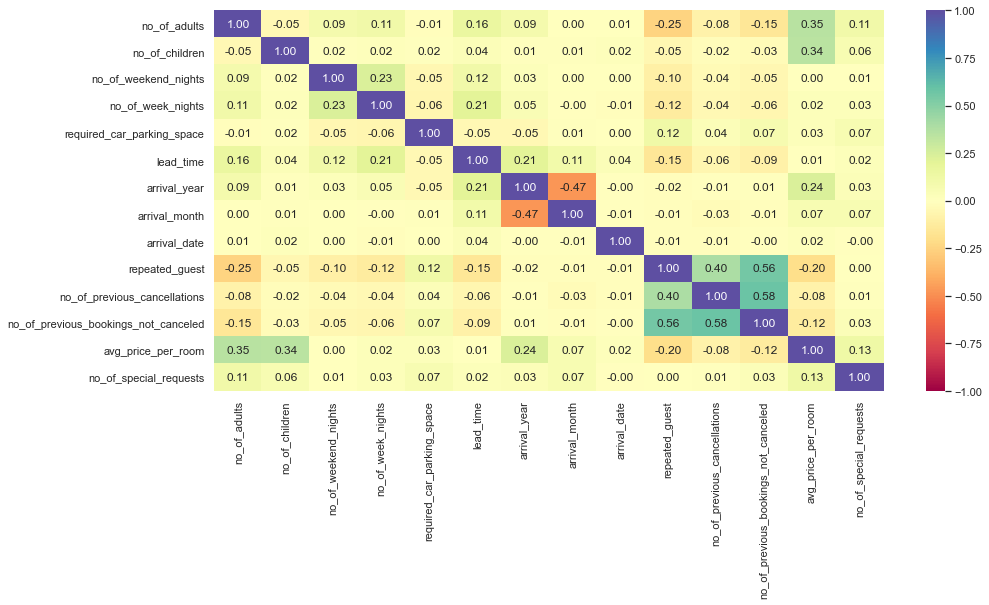

<IPython.core.display.Javascript object>

In [661]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [662]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


<IPython.core.display.Javascript object>

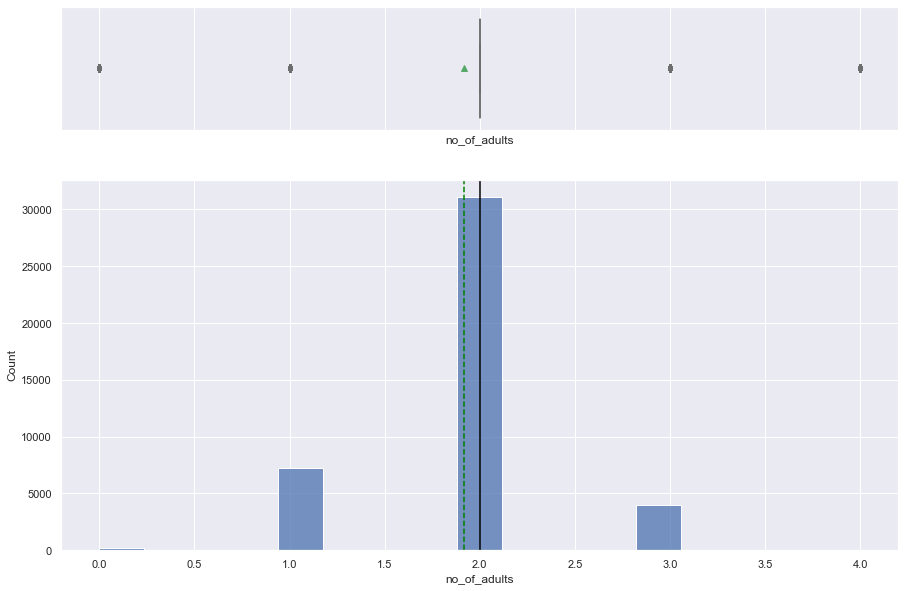

<IPython.core.display.Javascript object>

In [663]:
histogram_boxplot(df, "no_of_adults")

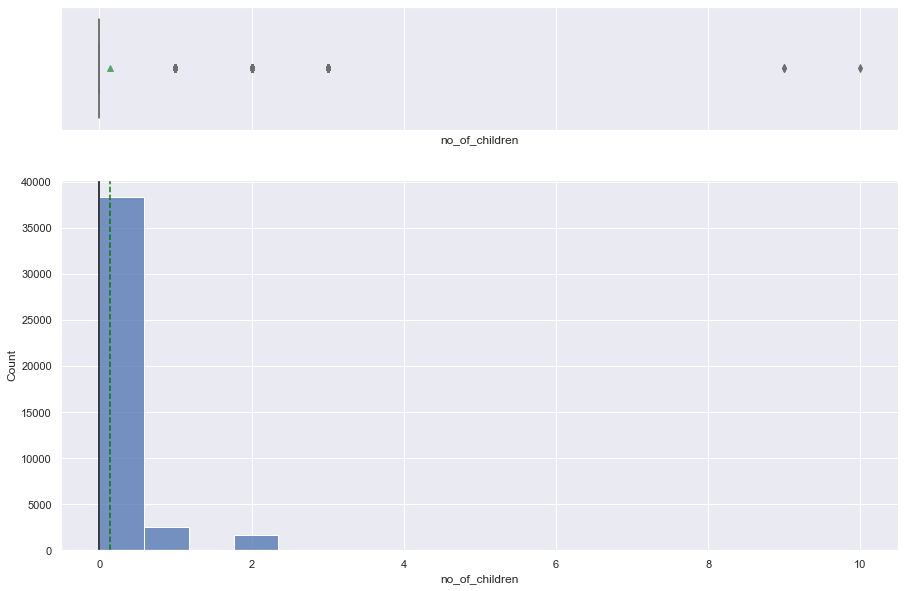

<IPython.core.display.Javascript object>

In [664]:
histogram_boxplot(df, "no_of_children")

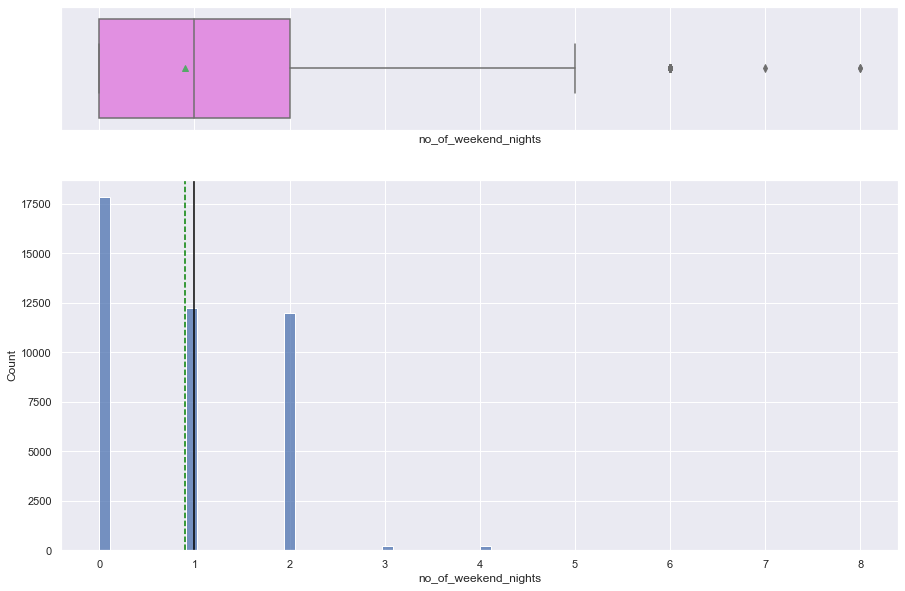

<IPython.core.display.Javascript object>

In [665]:
histogram_boxplot(df, "no_of_weekend_nights")

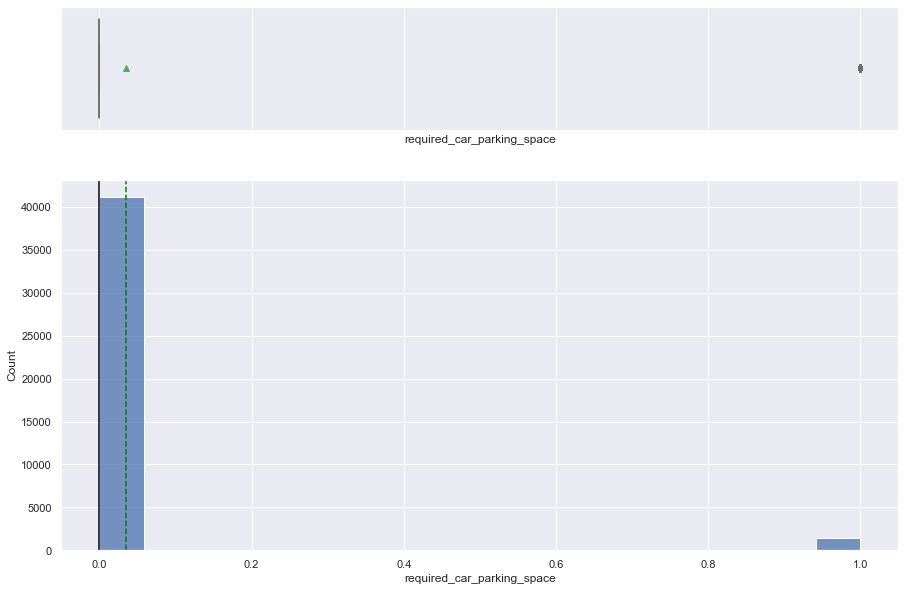

<IPython.core.display.Javascript object>

In [666]:
histogram_boxplot(df, "required_car_parking_space")

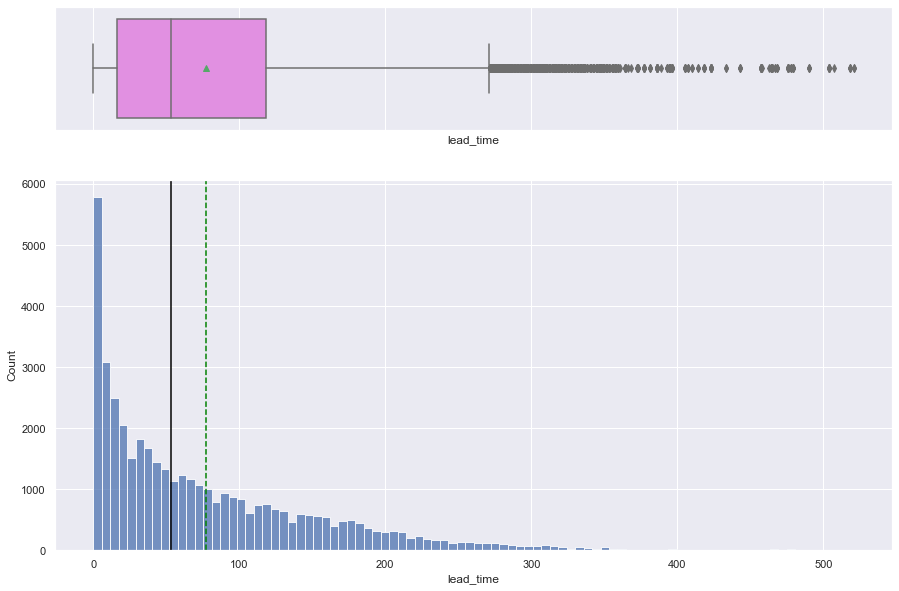

<IPython.core.display.Javascript object>

In [667]:
histogram_boxplot(df, "lead_time")

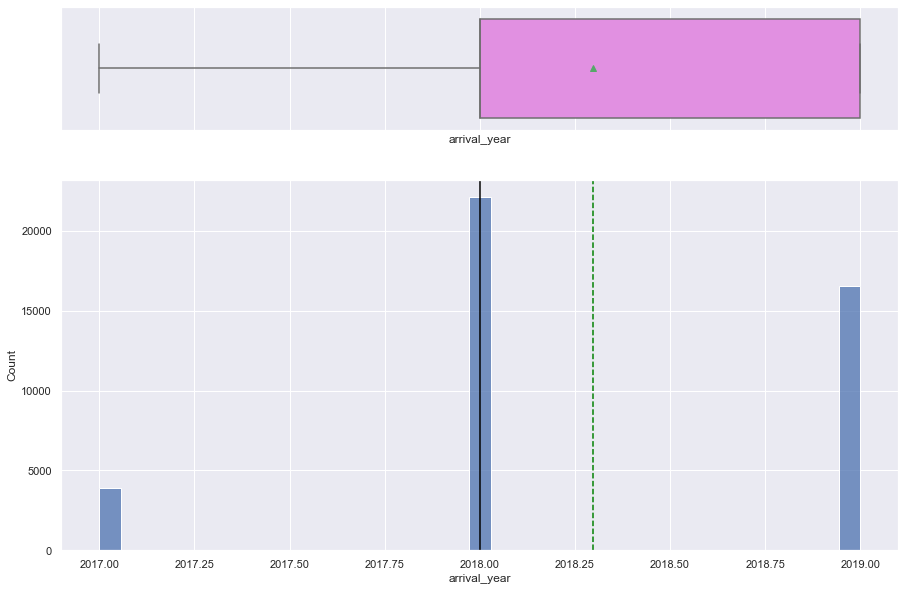

<IPython.core.display.Javascript object>

In [668]:
histogram_boxplot(df, "arrival_year")

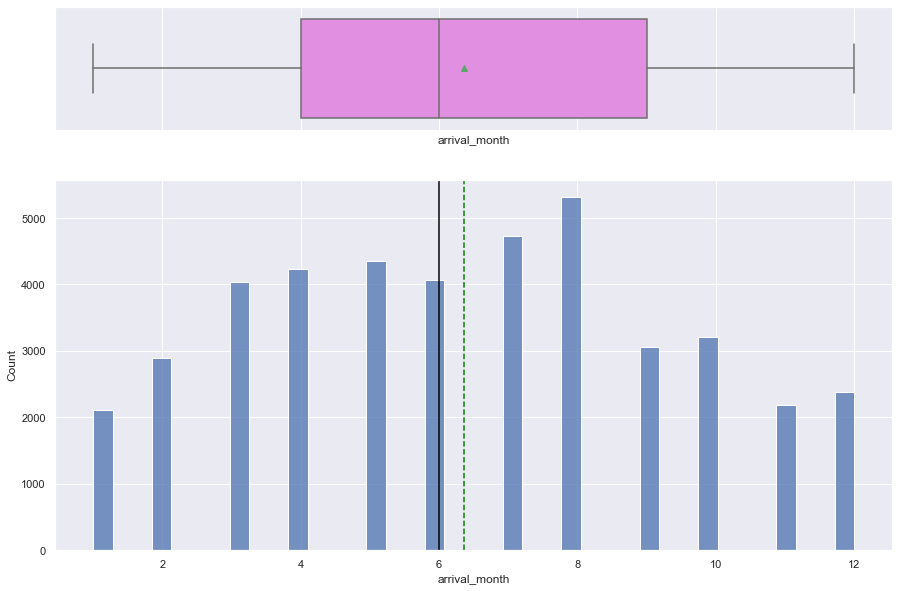

<IPython.core.display.Javascript object>

In [669]:
histogram_boxplot(df, "arrival_month")

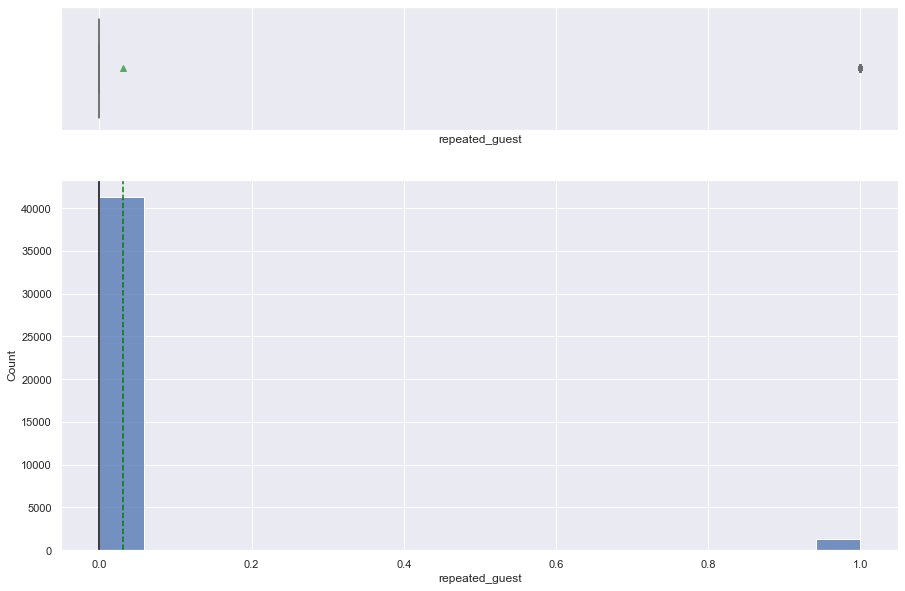

<IPython.core.display.Javascript object>

In [670]:
histogram_boxplot(df, "repeated_guest")

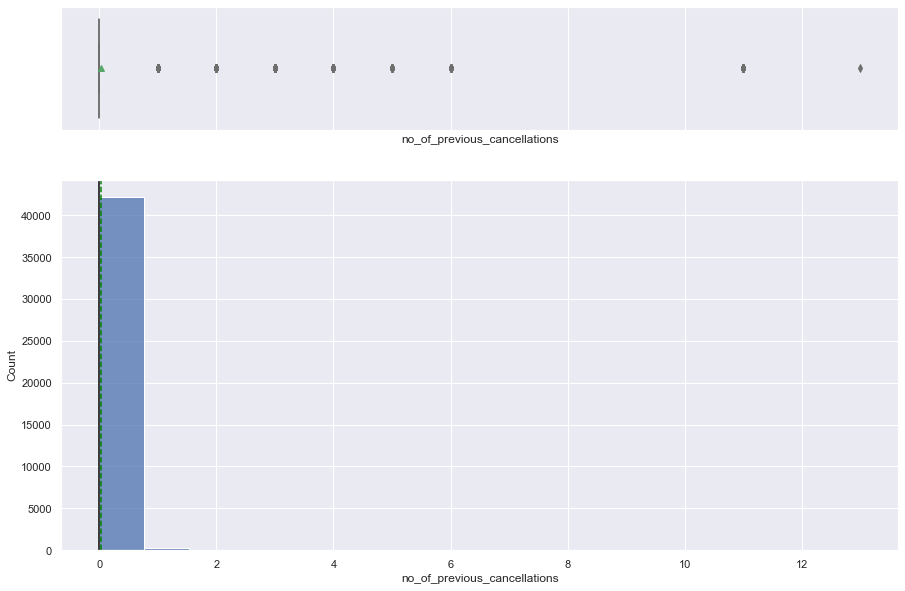

<IPython.core.display.Javascript object>

In [671]:
histogram_boxplot(df, "no_of_previous_cancellations")

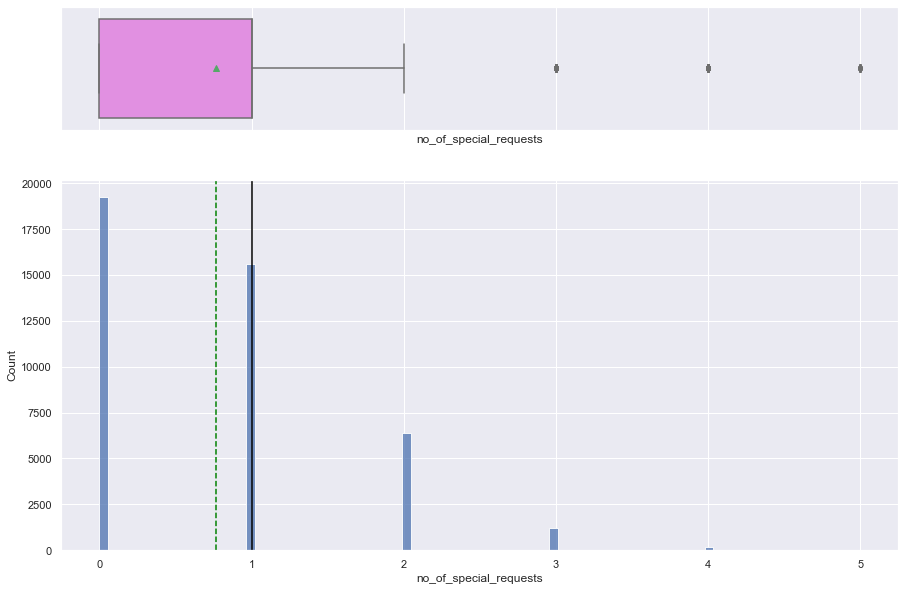

<IPython.core.display.Javascript object>

In [672]:
histogram_boxplot(df, "no_of_special_requests")

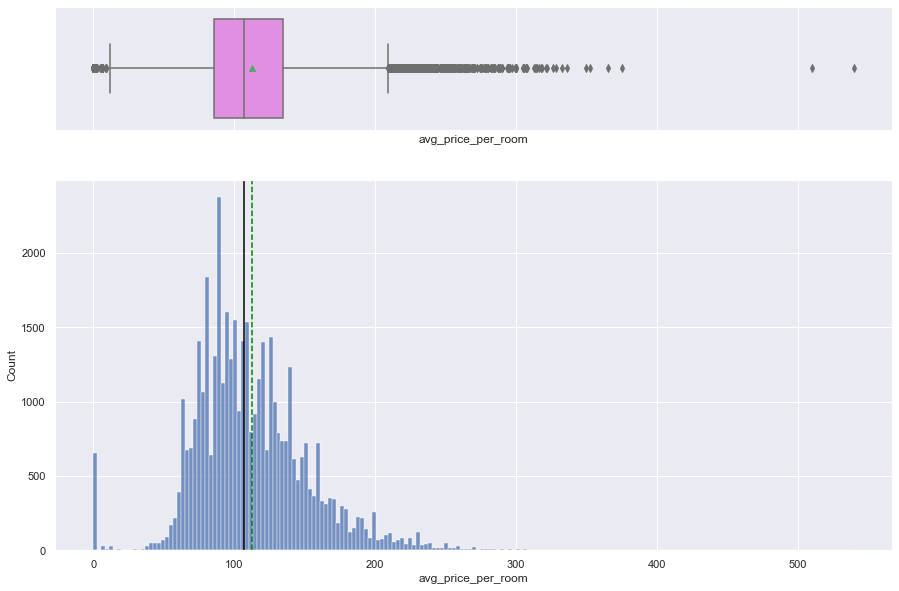

<IPython.core.display.Javascript object>

In [673]:
histogram_boxplot(df, "avg_price_per_room")

In [674]:
# histogram_boxplot(df, "booking_status")

<IPython.core.display.Javascript object>

In [675]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

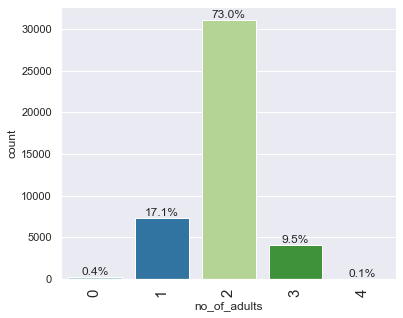

<IPython.core.display.Javascript object>

In [676]:
labeled_barplot(df, "no_of_adults", perc=True)

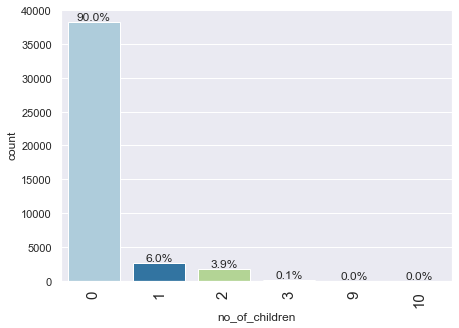

<IPython.core.display.Javascript object>

In [677]:
labeled_barplot(df, "no_of_children", perc=True)

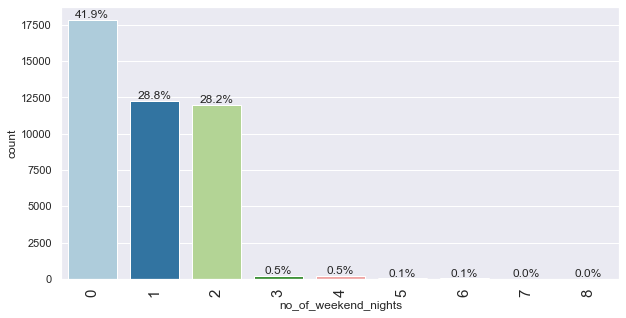

<IPython.core.display.Javascript object>

In [678]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

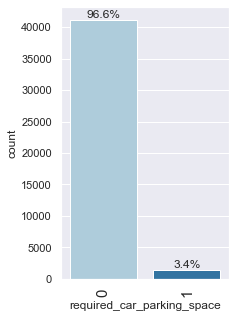

<IPython.core.display.Javascript object>

In [679]:
labeled_barplot(df, "required_car_parking_space", perc=True)

In [680]:
# labeled_barplot(df, "lead_time", perc=True)

<IPython.core.display.Javascript object>

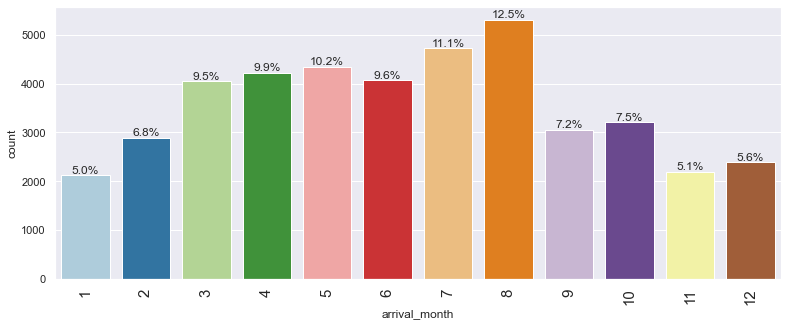

<IPython.core.display.Javascript object>

In [681]:
labeled_barplot(df, "arrival_month", perc=True)

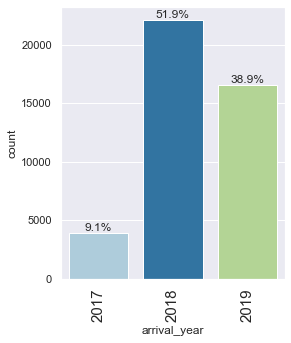

<IPython.core.display.Javascript object>

In [682]:
labeled_barplot(df, "arrival_year", perc=True)

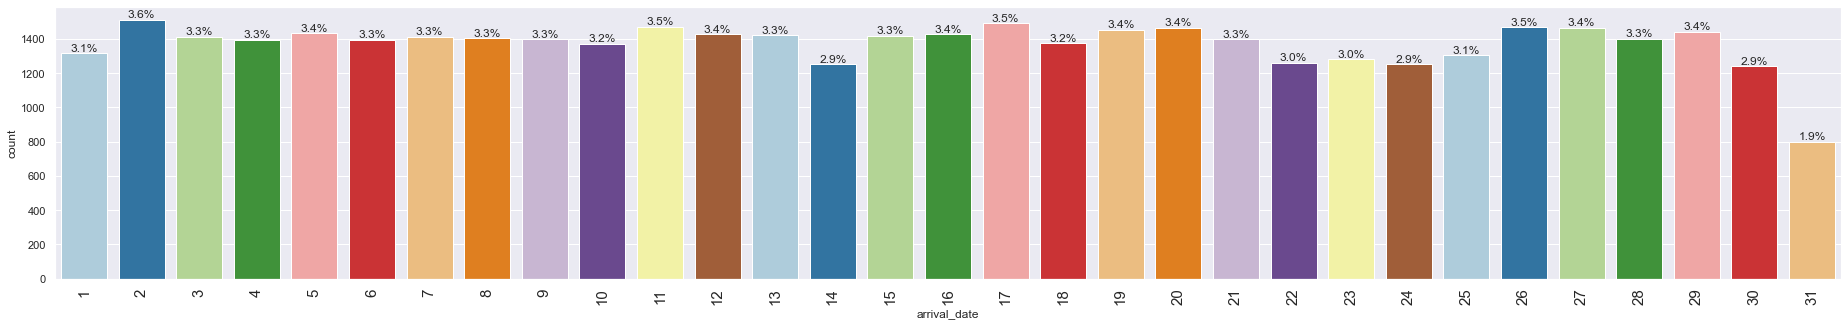

<IPython.core.display.Javascript object>

In [683]:
labeled_barplot(df, "arrival_date", perc=True)

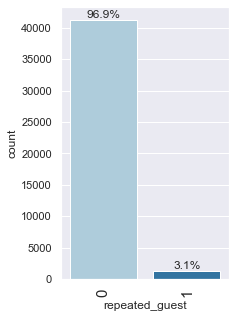

<IPython.core.display.Javascript object>

In [684]:
labeled_barplot(df, "repeated_guest", perc=True)

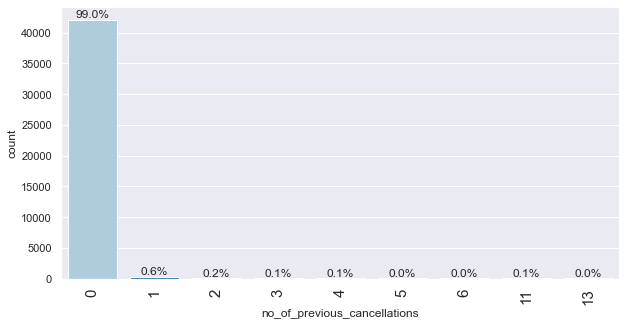

<IPython.core.display.Javascript object>

In [685]:
labeled_barplot(df, "no_of_previous_cancellations", perc=True)

In [686]:
# labeled_barplot(df, "no_of_previous_bookings_not_canceled", perc=True)

<IPython.core.display.Javascript object>

In [687]:
# labeled_barplot(df, "avg_price_per_room", perc=True)

<IPython.core.display.Javascript object>

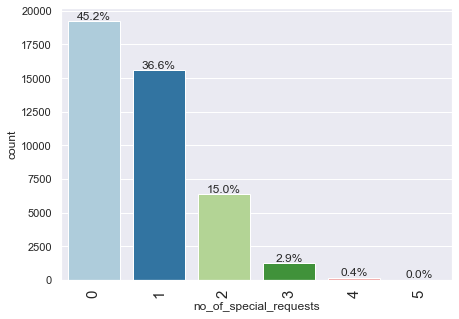

<IPython.core.display.Javascript object>

In [688]:
labeled_barplot(df, "no_of_special_requests", perc=True)

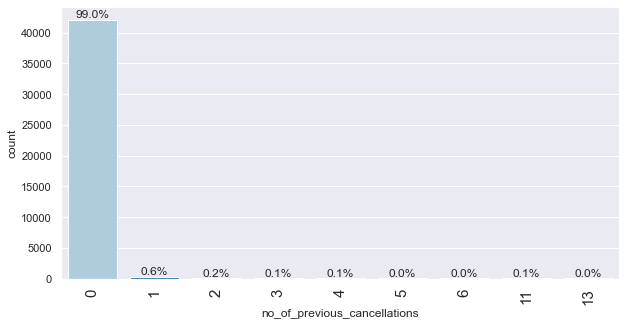

<IPython.core.display.Javascript object>

In [689]:
labeled_barplot(df, "no_of_previous_cancellations", perc=True)

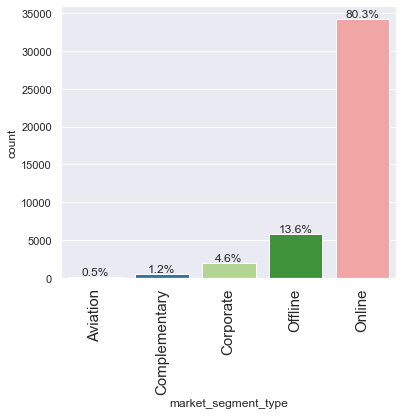

<IPython.core.display.Javascript object>

In [690]:
labeled_barplot(df, "market_segment_type", perc=True)

In [691]:
# Looking at the data again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

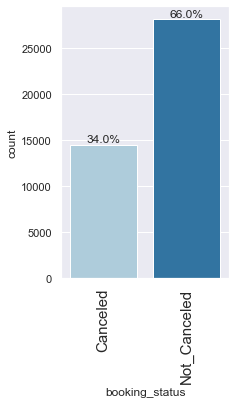

<IPython.core.display.Javascript object>

In [692]:
# Dropping 'booking_status' eventually.
labeled_barplot(df, "booking_status", perc=True)

## Bivariate Analysis

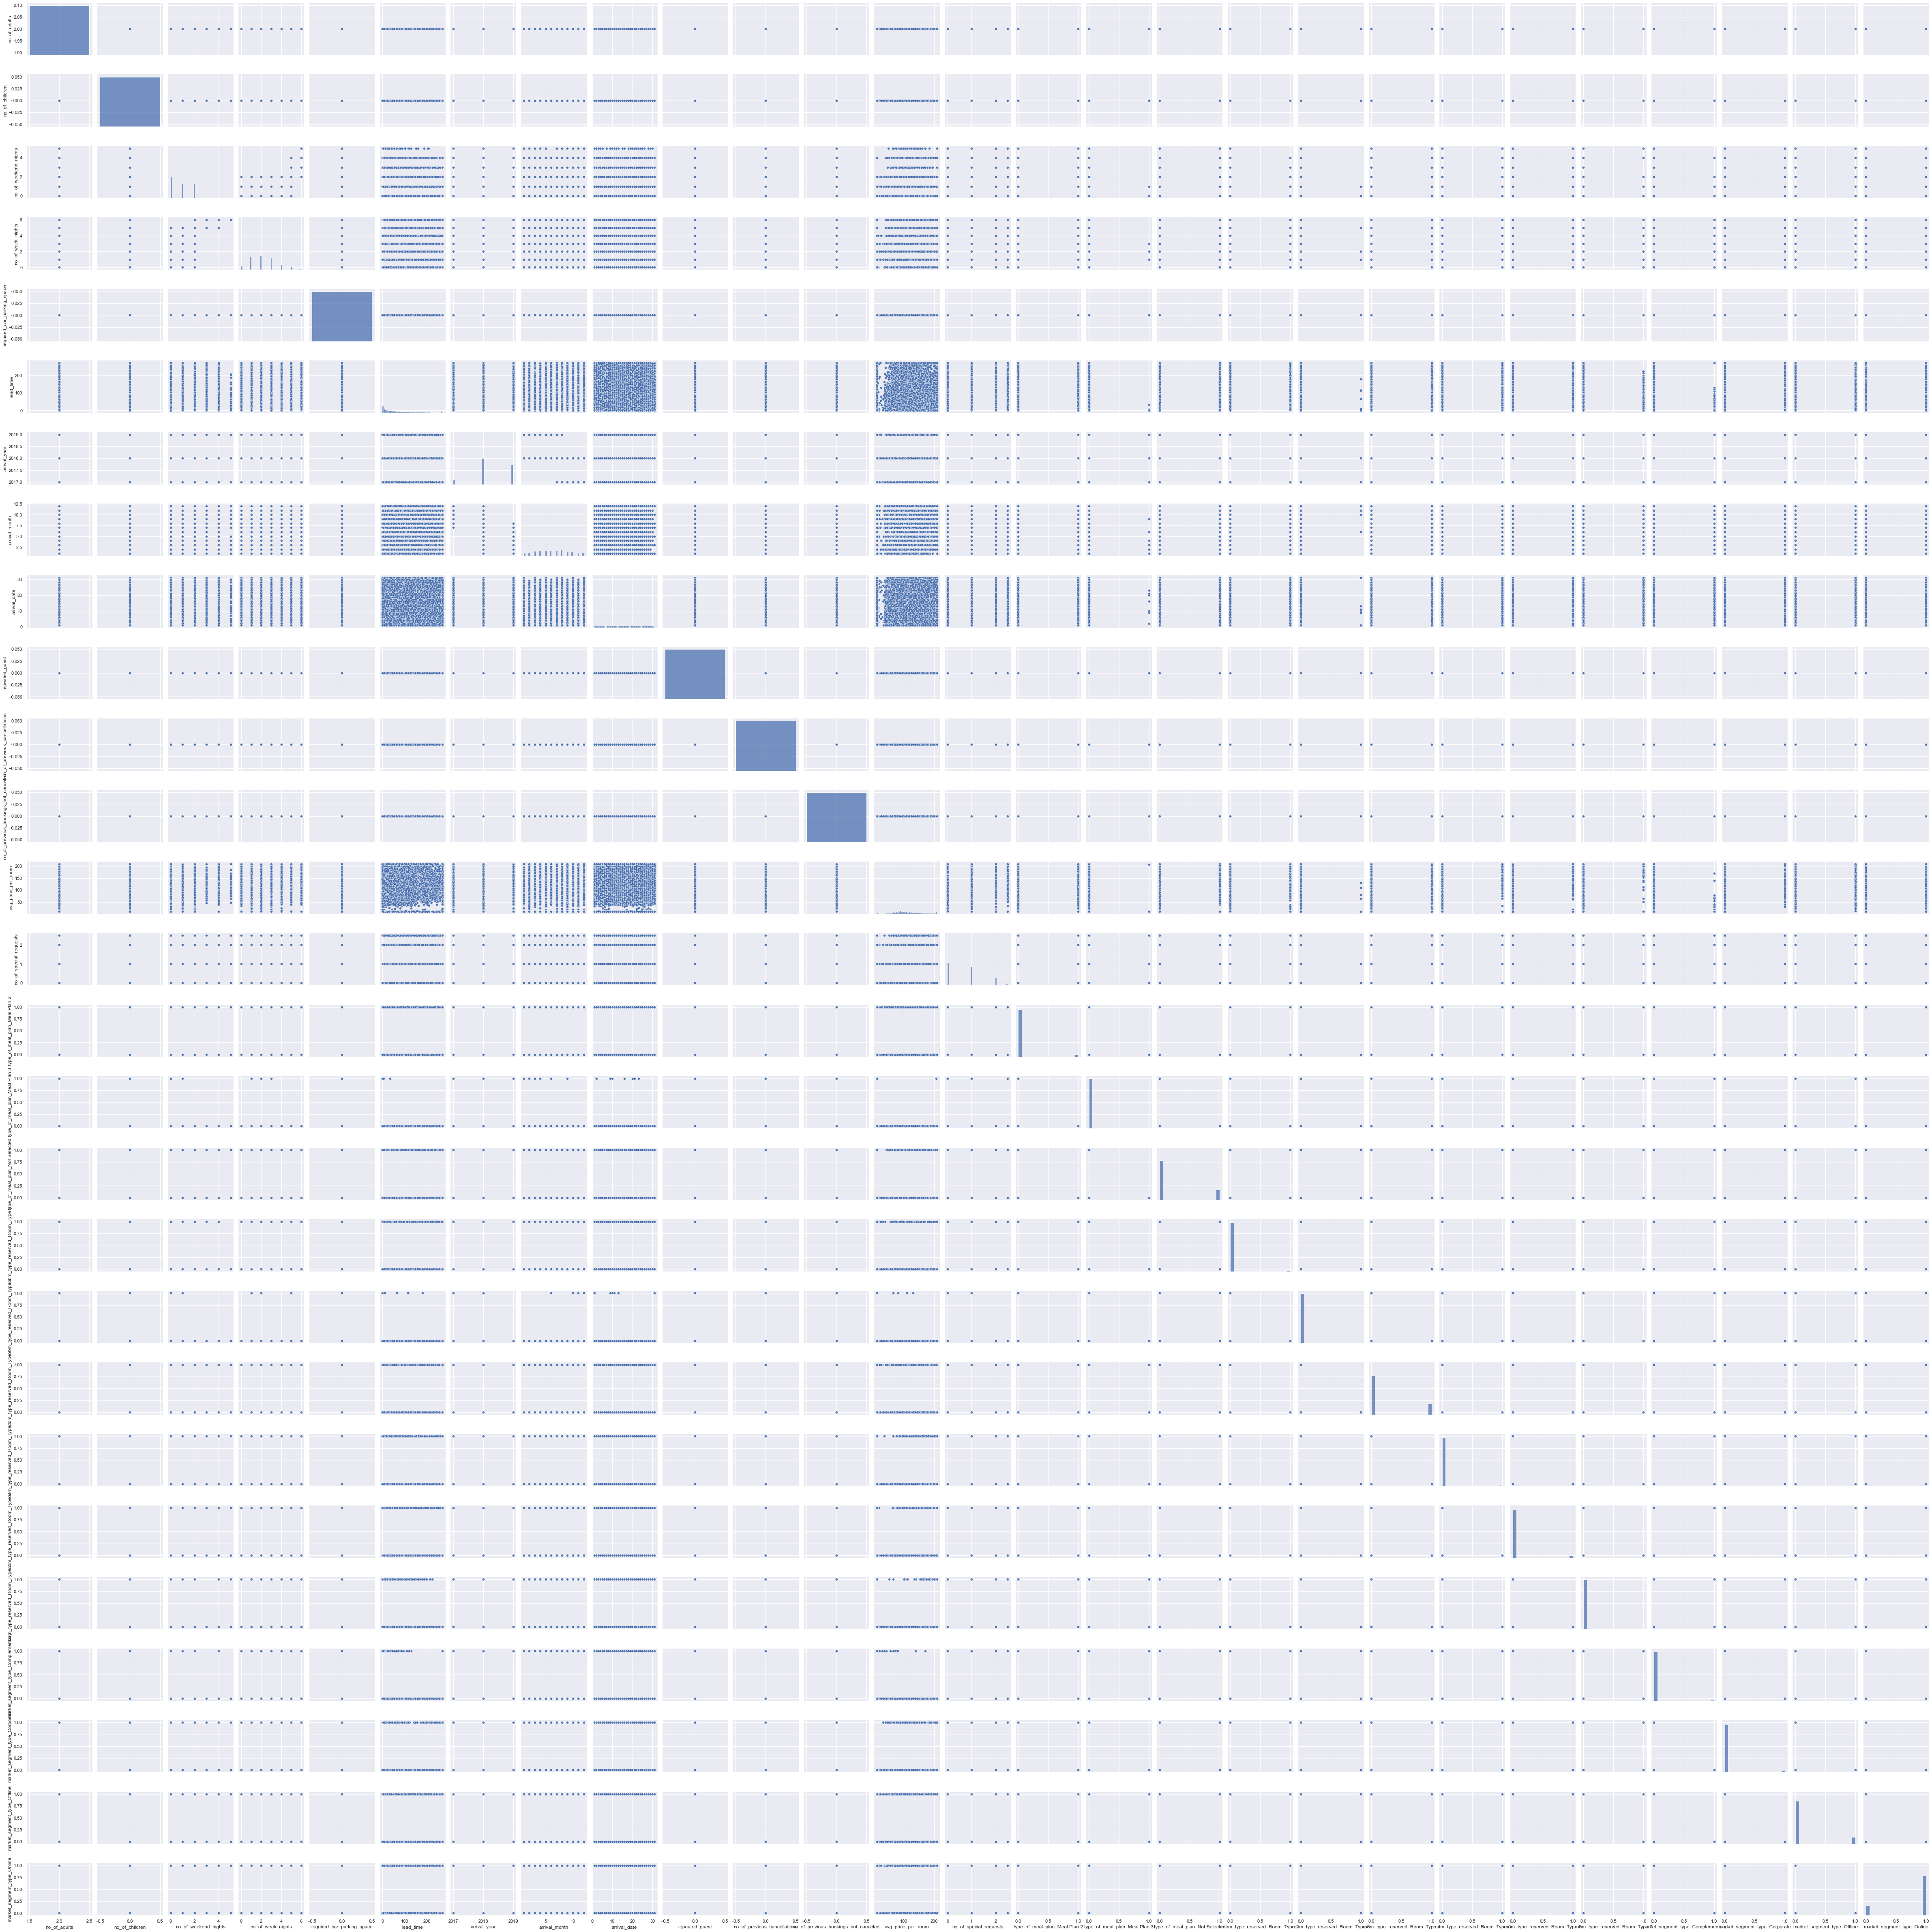

<IPython.core.display.Javascript object>

In [693]:
# this is a useful graph but takes a long time to load. Bring it back prior to final turn-in of project.
# sns.pairplot(data=X)

In [694]:
df.avg_price_per_room.round(decimals=-1)

0         60.0
1        110.0
2         60.0
3        100.0
4         90.0
         ...  
56920    100.0
56921    160.0
56922     90.0
56923     90.0
56924    160.0
Name: avg_price_per_room, Length: 42576, dtype: float64

<IPython.core.display.Javascript object>

In [695]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(df[predictor], df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [696]:
# stacked_barplot(df, "market_segment_type", "avg_price_per_room")
# This doesn't tell me anything. 


<IPython.core.display.Javascript object>

In [2]:
### function to plot distributions wrt target
# This code is from Great Learning


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="count",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="count",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [3]:
# Answers comparison of Market type and average prices
distribution_plot_wrt_target(df, "market_segment_type", "avg_price_per_room")

NameError: name 'df' is not defined

In [4]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

NameError: name 'df' is not defined

In [1]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

NameError: name 'distribution_plot_wrt_target' is not defined

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

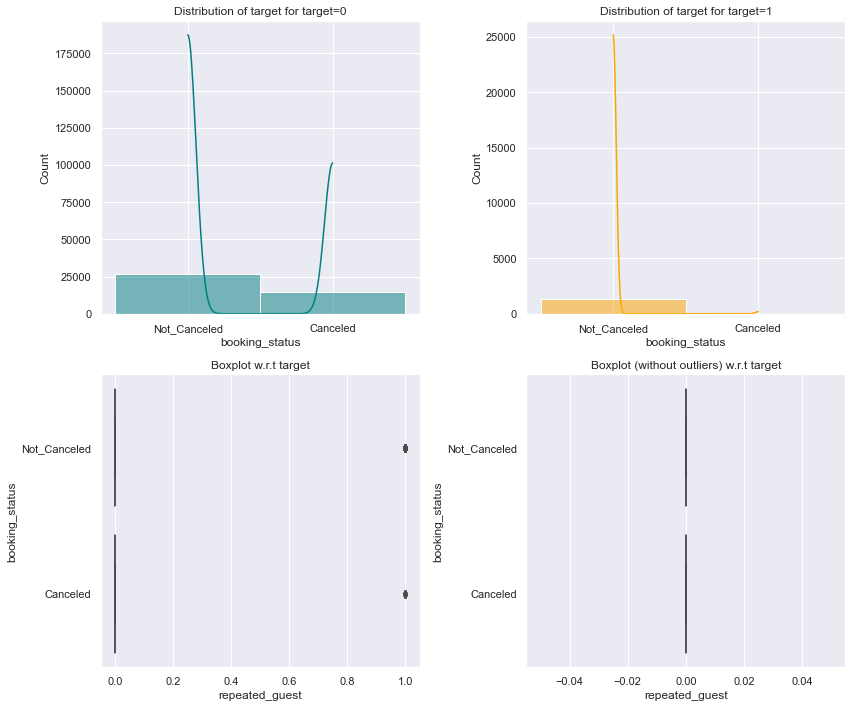

<IPython.core.display.Javascript object>

In [700]:
# Compares repeated  guests to their booking status.
distribution_plot_wrt_target(df, "booking_status", "repeated_guest")

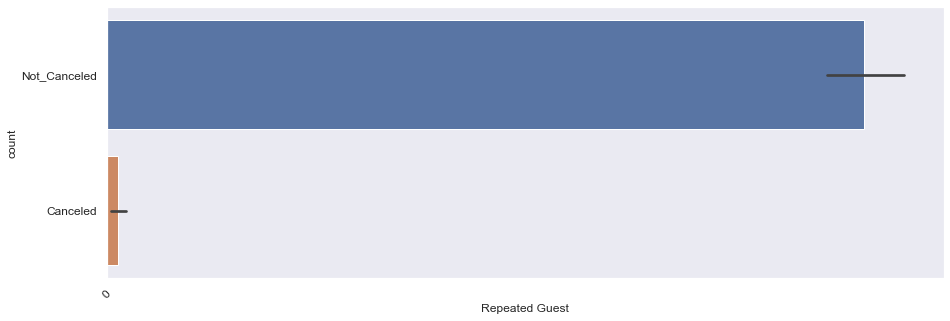

<IPython.core.display.Javascript object>

In [701]:
plt.figure(figsize=(15, 5))
ax = sns.countplot()


sns.barplot(data=df, y="booking_status", x="repeated_guest")
plt.xticks(size=12, rotation=45)
plt.xlabel("repeated_guest", size=12)
plt.yticks(size=12)
plt.ylabel("count", size=12)
ax.set_xlabel("Repeated Guest")

plt.show()

repeated_guest      0     1    All
booking_status                    
All             41261  1315  42576
Not_Canceled    26784  1305  28089
Canceled        14477    10  14487
------------------------------------------------------------------------------------------------------------------------


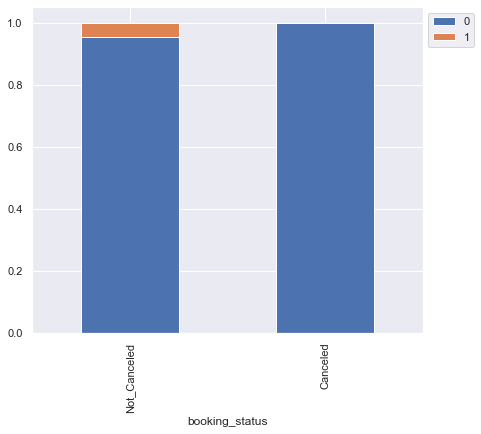

<IPython.core.display.Javascript object>

In [702]:
# Another comparison of booking status and repeated guest
stacked_barplot(df, "booking_status", "repeated_guest")

In [703]:
# Seeing the data
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1        277   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2019              7            13              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               89.10   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       2       Canceled

<IPython.core.display.Javascript object>

In [704]:
# Seeing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

no_of_special_requests      0      1     2     3    4   5    All
booking_status                                                  
Not_Canceled            10476  11225  4992  1230  150  16  28089
All                     19228  15571  6381  1230  150  16  42576
Canceled                 8752   4346  1389     0    0   0  14487
------------------------------------------------------------------------------------------------------------------------


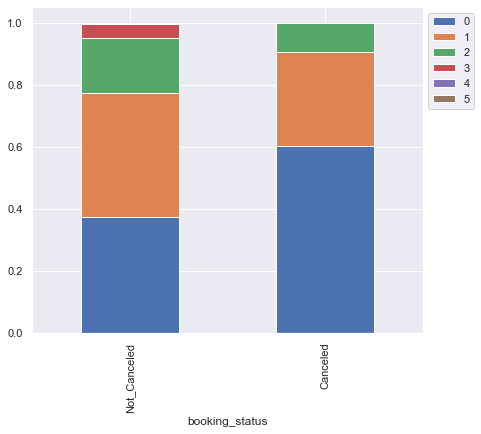

<IPython.core.display.Javascript object>

In [705]:
# Answers question 6.
stacked_barplot(df, "booking_status", "no_of_special_requests")

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        14487         28089  42576
0                           8752         10476  19228
1                           4346         11225  15571
2                           1389          4992   6381
3                              0          1230   1230
4                              0           150    150
5                              0            16     16
------------------------------------------------------------------------------------------------------------------------


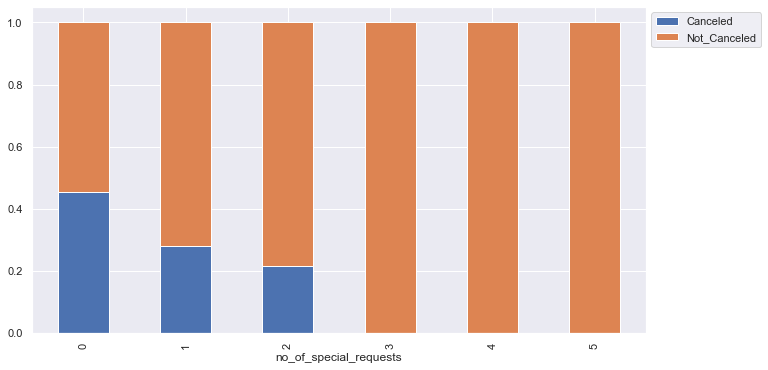

<IPython.core.display.Javascript object>

In [706]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

<AxesSubplot:xlabel='no_of_special_requests', ylabel='count'>

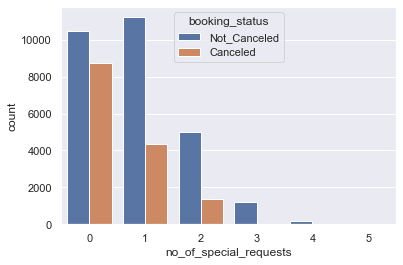

<IPython.core.display.Javascript object>

In [707]:
# Best answer to question 6
sns.countplot(x="no_of_special_requests", hue="booking_status", data=df)

In [708]:
# cancellation rate of 0 special requests
unpicky = ((14184 - 15390) / 15390) * -100
unpicky
# 8% cancelation rate with no special requests

7.83625730994152

<IPython.core.display.Javascript object>

In [709]:
# sample with special requests who canceled.
picky = ((5703 + 1661) / (56926)) * 100
picky
# 13% of overall cancellations have special requests

12.936092470927168

<IPython.core.display.Javascript object>

In [710]:
# cancellation % of 0 special requests
unpicky = (14184 / 56926) * 100
unpicky
# 25% cancel with no special requests

24.91655833889611

<IPython.core.display.Javascript object>

In [711]:
# rate of sample with special requests who canceled.
picky = (
    ((5703 + 1661) - (12837 + 5607 + 1356 + 169 + 19))
    / (12837 + 5607 + 1356 + 169 + 19)
    * -100
)
picky
# 63% completion rate among sample who have special requests

63.1578947368421

<IPython.core.display.Javascript object>

## Data Preprocessing

- Missing value treatment (Completed)
- Feature engineering (if needed- Convert Strings to integers) Note: Intending to drop 'booking_status'
- Outlier detection and treatment (Treated)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [712]:
# Seeing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

In [713]:
# identifies duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
56920    False
56921    False
56922    False
56923    False
56924    False
Length: 42576, dtype: bool

<IPython.core.display.Javascript object>

In [714]:
df.info

<bound method DataFrame.info of        no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 3               0                     0                  3   
...             ...             ...                   ...                ...   
56920             2               0                     2                  6   
56921             2               1                     0                  1   
56922             2               0                     1                  1   
56923             2               0                     0                  3   
56924             2               0                     2                  2   

      t

<IPython.core.display.Javascript object>

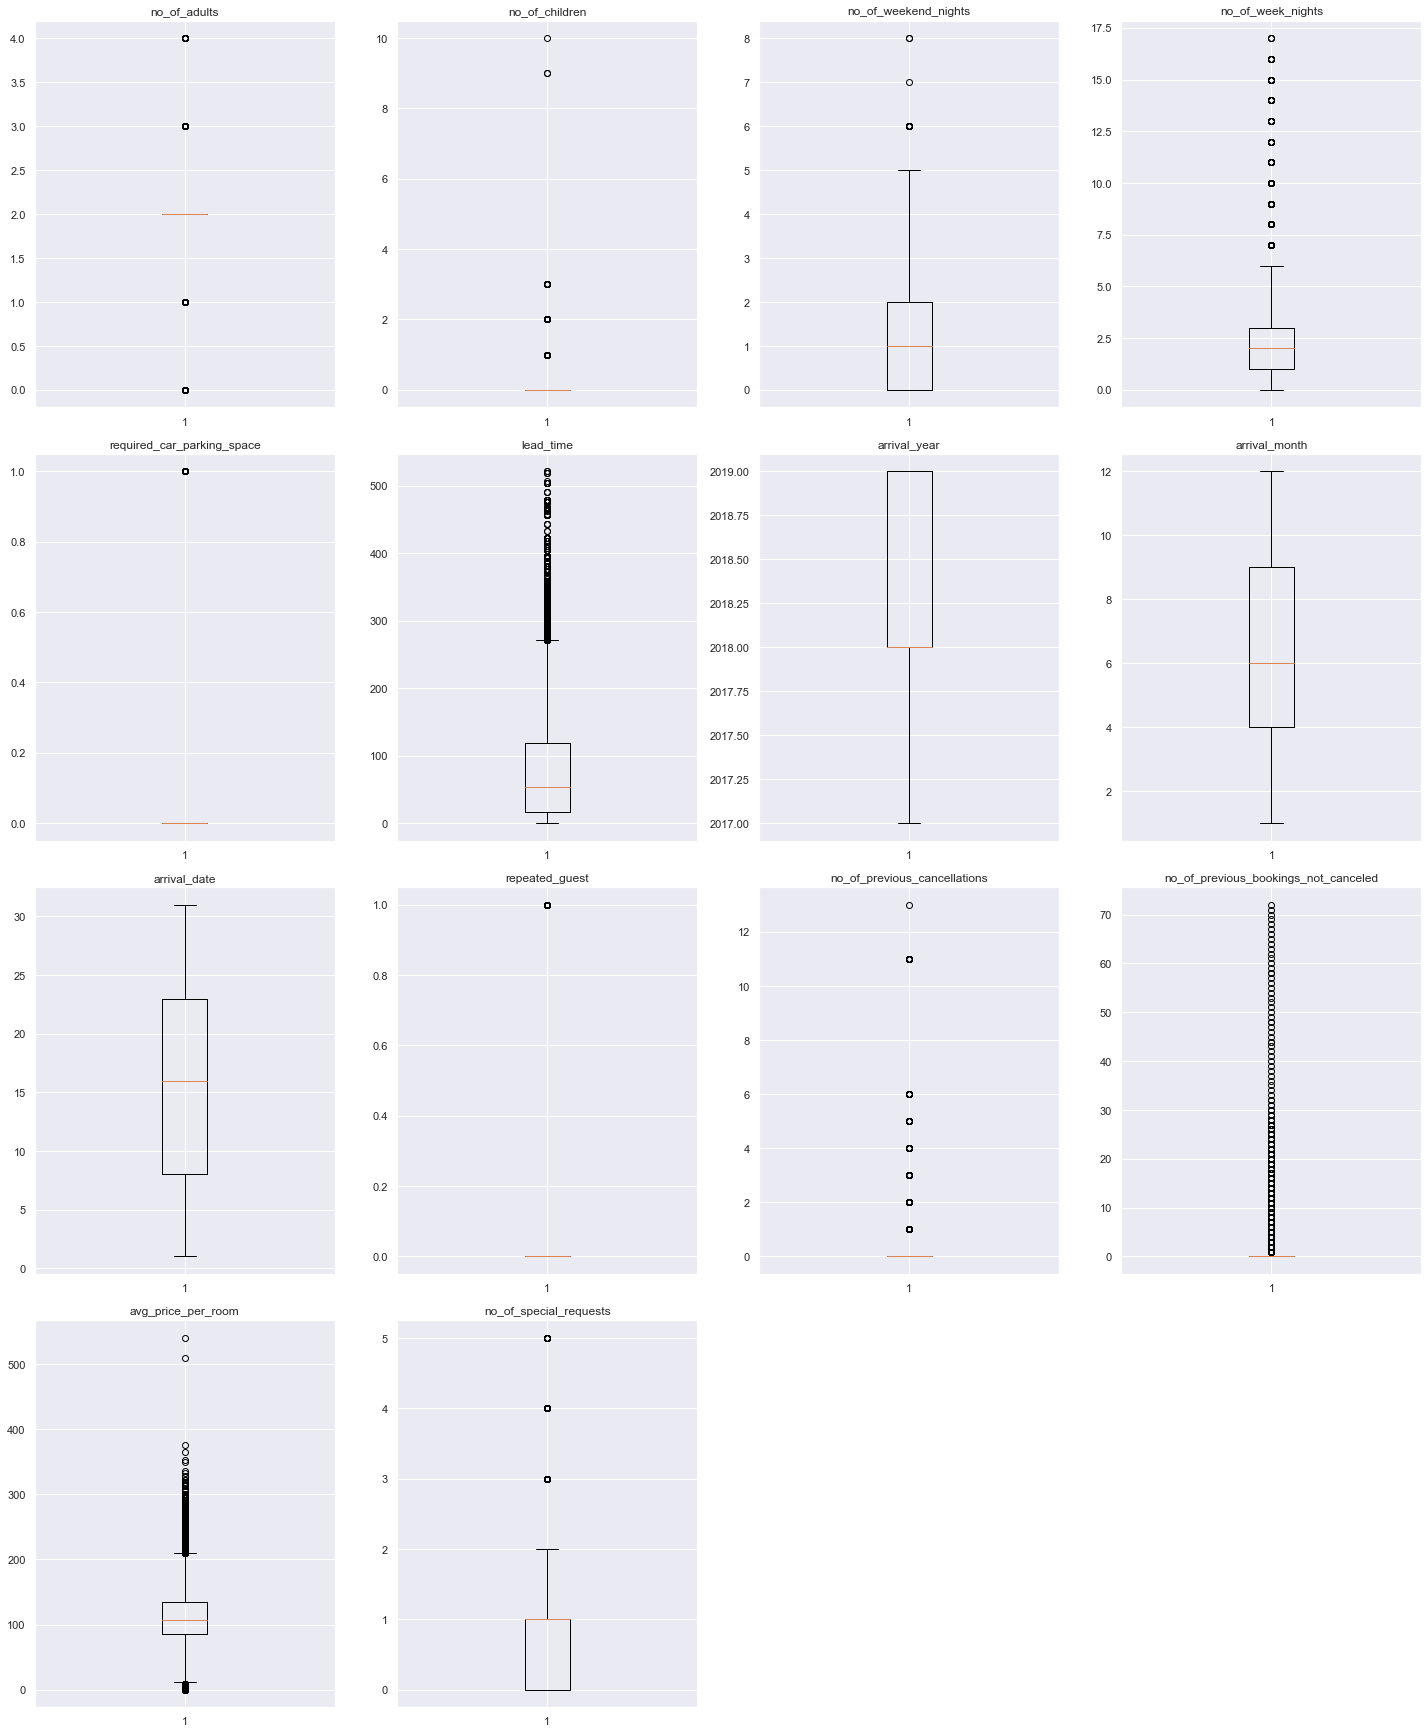

<IPython.core.display.Javascript object>

In [715]:
# Calculates boxplots
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [716]:
# There appears to be a lot of boxplots in the data. This functions to treat outliers by flooring and capping the data


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [717]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

<IPython.core.display.Javascript object>

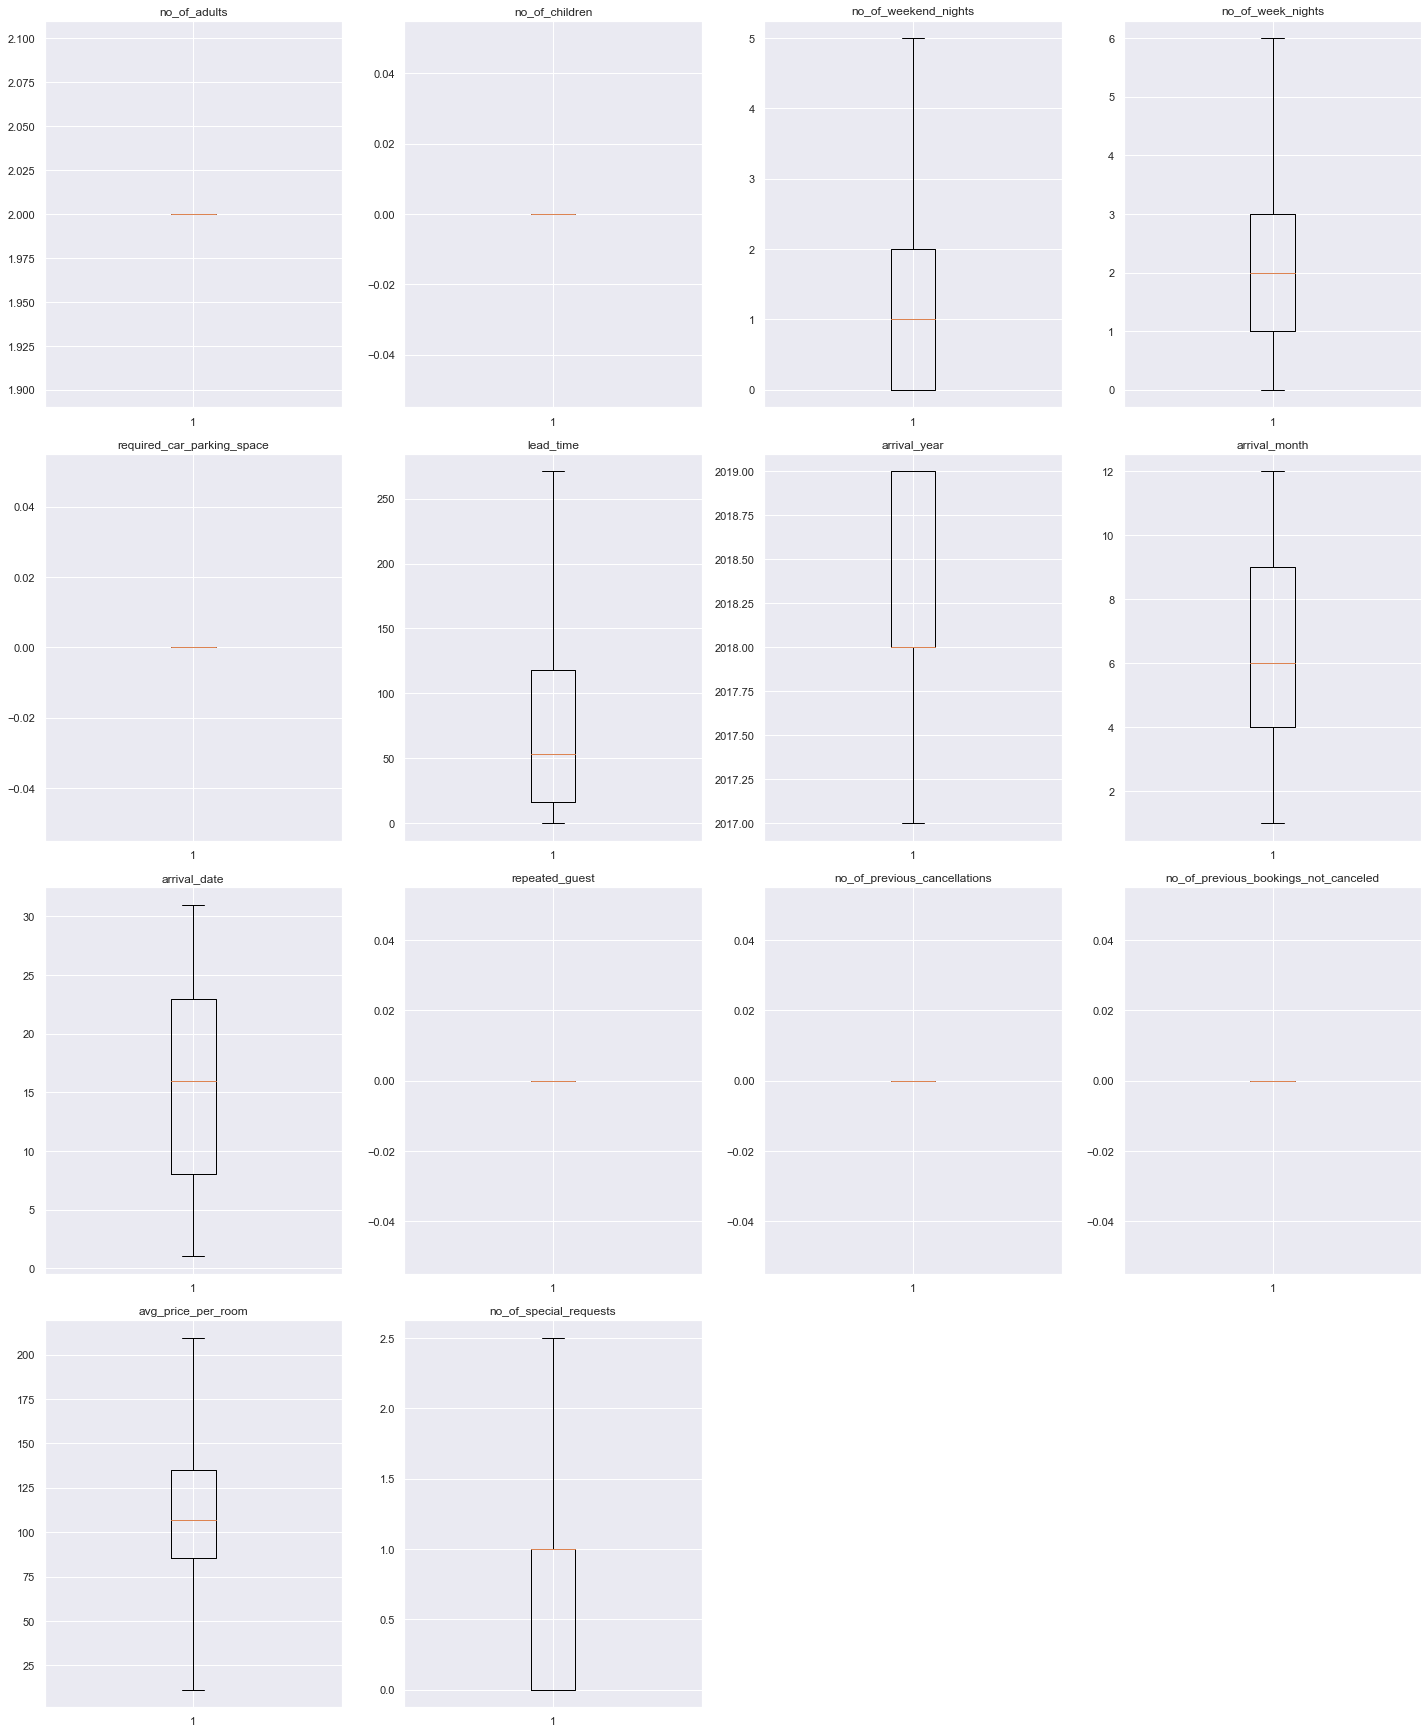

<IPython.core.display.Javascript object>

In [718]:
# let's look at box plot to see if outliers have been treated or not. They are gone.
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

In [720]:
# creating dummy variables
df = pd.get_dummies(
    df,
    columns=["type_of_meal_plan", "room_type_reserved", "market_segment_type",],
    drop_first=True,
)
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             2               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     0                  3   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0        271          2019              7   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0             2               0                             0   
1             6               0                             0   
2            28               0                             0   
3            20               0                             0   
4            13               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               89.10   

   no_of_special_requests booking_status  type_of_meal_plan_Meal Plan 2  \
0                     0.0   Not_Canceled                              0   
1                     1.0   Not_Canceled                              0   
2                     0.0       Canceled                              0   
3                     0.0       Canceled                              0   
4                     2.0       Canceled                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                  

<IPython.core.display.Javascript object>

In [721]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   required_car_parking_space            42576 non-null  int64  
 5   lead_time                             42576 non-null  int64  
 6   arrival_year                          42576 non-null  int64  
 7   arrival_month                         42576 non-null  int64  
 8   arrival_date                          42576 non-null  int64  
 9   repeated_guest                        42576 non-null  int64  
 10  no_of_previous_cancellations          42576 non-null  int64  
 11  no_of_previous_

<IPython.core.display.Javascript object>

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data. I dropped a bunch of variables based on VIF; later I had an error that indicated I had over controlled the data.

In [722]:
# df = df.drop(
#   [
#        "market_segment_type_Complementary",
#        "market_segment_type_Corporate",
#        "market_segment_type_Offline",
#        "market_segment_type_Online",
#       "avg_price_per_room",
#        "arrival_year",
#    ],
#    axis=1,
# )

<IPython.core.display.Javascript object>

In [723]:
# Note: This is my manual drop of fields with multicollinearity.

<IPython.core.display.Javascript object>

In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   required_car_parking_space            42576 non-null  int64  
 5   lead_time                             42576 non-null  int64  
 6   arrival_year                          42576 non-null  int64  
 7   arrival_month                         42576 non-null  int64  
 8   arrival_date                          42576 non-null  int64  
 9   repeated_guest                        42576 non-null  int64  
 10  no_of_previous_cancellations          42576 non-null  int64  
 11  no_of_previous_

<IPython.core.display.Javascript object>

In [725]:
# thoughts on booking_status
# 1
## Label encoding for some values
df["booking_status"] = df["booking_status"].astype("category")
df["booking_status"] = df["booking_status"].cat.codes
df.head()

# 2
X = df.drop(["booking_status"], axis=1)  # Features
Y = df["booking_status"].astype("int8")  # Labels (Target Variable)
print(X.head())
print(Y.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             2               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     0                  3   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0        271          2019              7   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0             2               0        

<IPython.core.display.Javascript object>

In [726]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   required_car_parking_space            42576 non-null  int64  
 5   lead_time                             42576 non-null  int64  
 6   arrival_year                          42576 non-null  int64  
 7   arrival_month                         42576 non-null  int64  
 8   arrival_date                          42576 non-null  int64  
 9   repeated_guest                        42576 non-null  int64  
 10  no_of_previous_cancellations          42576 non-null  int64  
 11  no_of_previous_

<IPython.core.display.Javascript object>

# Building a Logistic Regression model

In [727]:
# Logistic Modeling

<IPython.core.display.Javascript object>

In [728]:
# Defining a function to compute different metrics to check performance of a classification model built using statsmodels
# This is a Great Learning function
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [729]:
# defining a function to plot the confusion_matrix of a classification model
# This is a Great Learning function


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [730]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data
# and easier
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [731]:
# function for understanding logistic regression data
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (29803, 27)
Shape of test set :  (12773, 27)
Percentage of classes in training set:
1    0.661074
0    0.338926
Name: booking_status, dtype: float64
Percentage of classes in test set:
1    0.656619
0    0.343381
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

In [732]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
# This function is from Great Learning
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [733]:
# defining a function to plot the confusion_matrix of a classification model
# This function is from Great Learning


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [734]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data
# This is the easiest logistic regression model
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [735]:
# predicting on training set
y_pred_train = lg.predict(X_train)

<IPython.core.display.Javascript object>

In [736]:
# As stated
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.7906251048552159
Precision: 0.8145915124322303
Recall: 0.8846310019287382
F1: 0.8481677940532386


<IPython.core.display.Javascript object>

In [737]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

<IPython.core.display.Javascript object>

In [738]:
# As Stated
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.788694903311673
Precision: 0.8106159895150721
Recall: 0.8849409800882317
F1: 0.8461494613236049


<IPython.core.display.Javascript object>

Notes: F1 test and F1 train are comparable at .83. That's great! Next will be classification.

# Model performance evaluation

In [739]:
# Classification

<IPython.core.display.Javascript object>

In [740]:
##  Function to calculate recall score
# This is a Great Leanrning function
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [741]:
# This is also a Great Learning function
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [742]:
# Working on the decision tree
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.25, 1: 0.75}, random_state=1
)

<IPython.core.display.Javascript object>

In [743]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.25, 1: 0.75}, random_state=1)

<IPython.core.display.Javascript object>

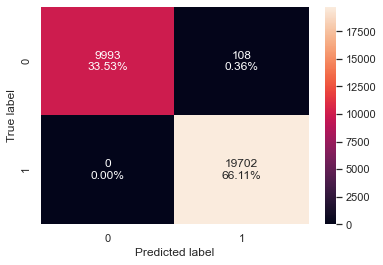

<IPython.core.display.Javascript object>

In [744]:
# Training
confusion_matrix_sklearn(model, X_train, y_train)

In [745]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

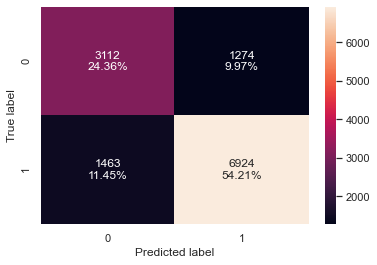

<IPython.core.display.Javascript object>

In [746]:
# Initial Testing
confusion_matrix_sklearn(model, X_test, y_test)

In [747]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8255633718850602


<IPython.core.display.Javascript object>

In [748]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

# Building a Decision Tree model

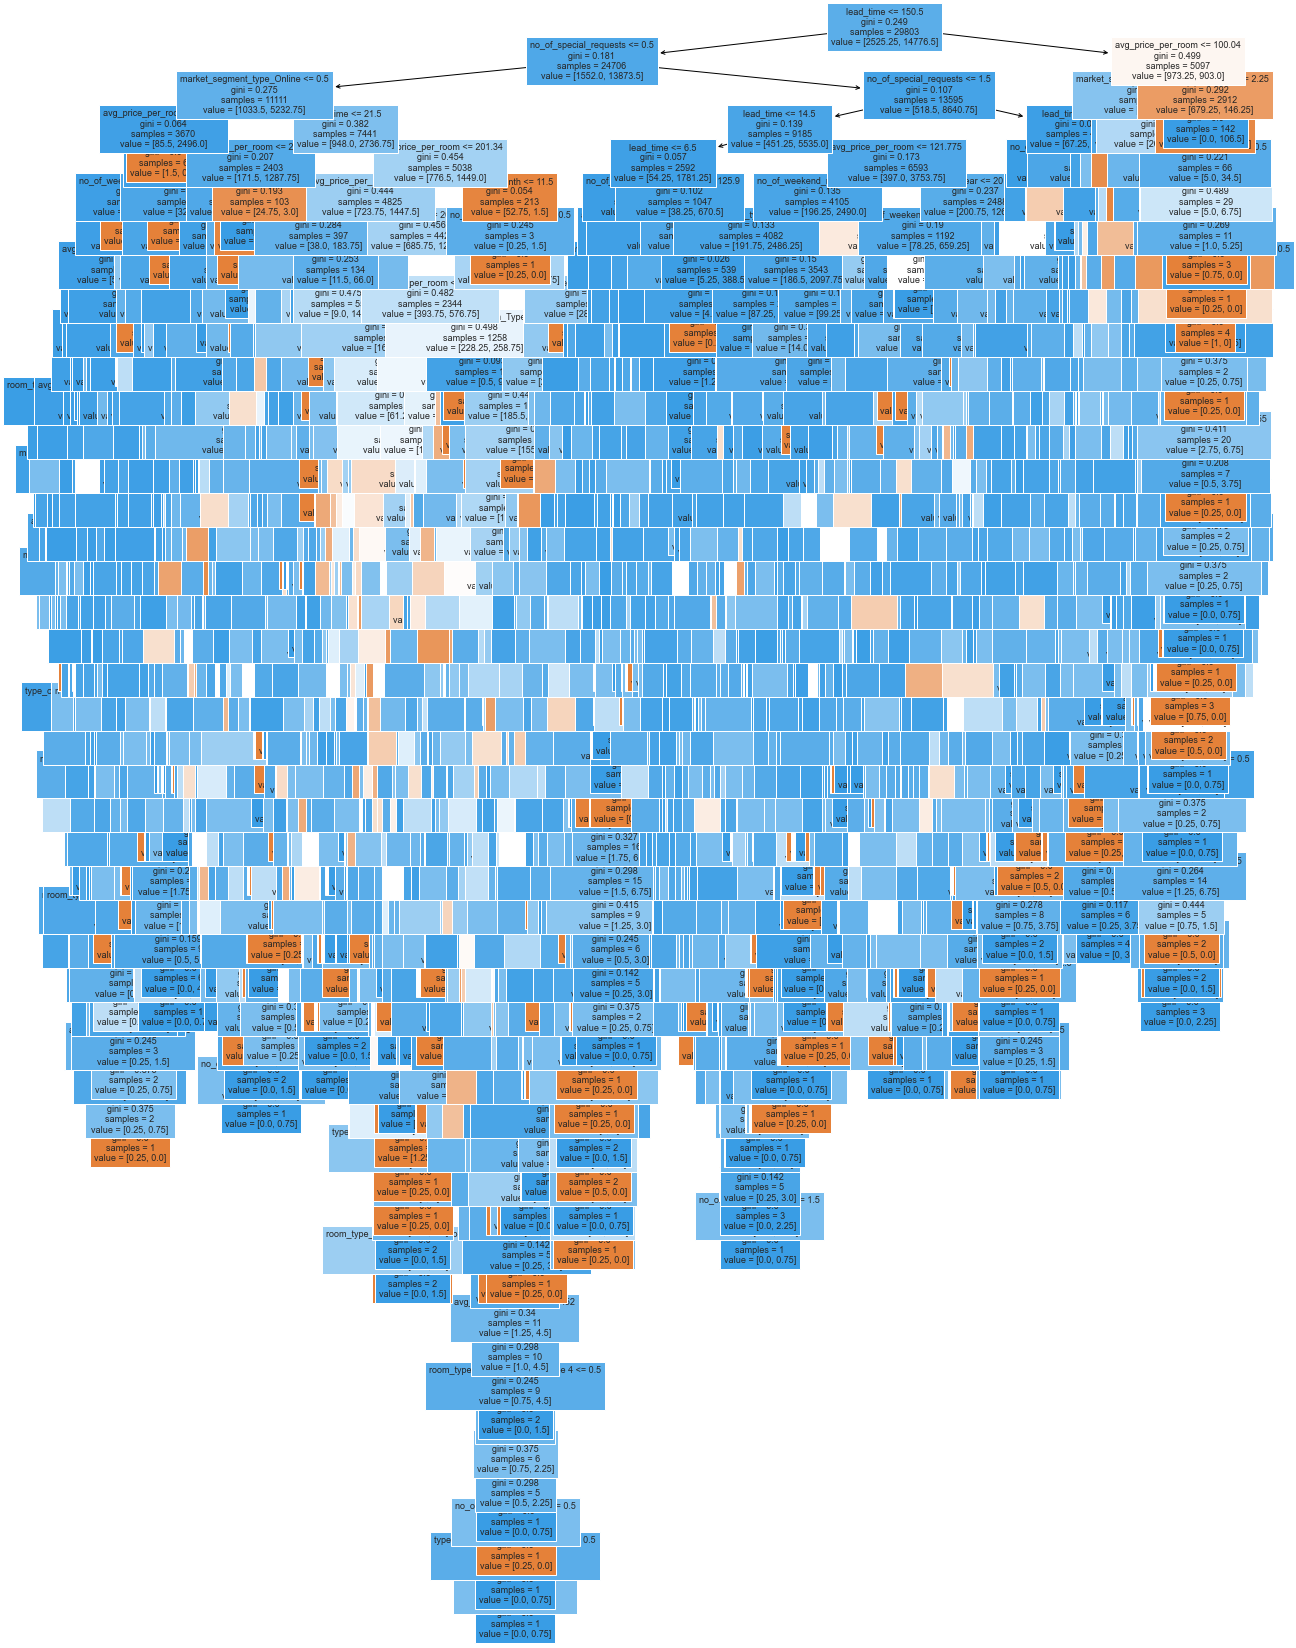

<IPython.core.display.Javascript object>

In [749]:
# Steps to a decision tree
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [750]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- avg_price_per_room <= 207.90
|   |   |   |   |--- lead_time <= 91.50
|   |   |   |   |   |--- no_of_weekend_nights <= 4.50
|   |   |   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 75.54
|   |   |   |   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |   |   |   |--- lead_time <= 17.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_month <= 6.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- arrival_month >  6.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |--- lead_time >  17.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_week_nights <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   

<IPython.core.display.Javascript object>

In [751]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance
# Importance of features
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.314048
avg_price_per_room                    0.211534
arrival_date                          0.114808
no_of_special_requests                0.100294
arrival_month                         0.066711
no_of_week_nights                     0.057882
market_segment_type_Online            0.046095
no_of_weekend_nights                  0.038050
arrival_year                          0.013095
type_of_meal_plan_Not Selected        0.012319
room_type_reserved_Room_Type 4        0.011419
type_of_meal_plan_Meal Plan 2         0.005483
room_type_reserved_Room_Type 2        0.002935
room_type_reserved_Room_Type 5        0.002268
room_type_reserved_Room_Type 6        0.001959
market_segment_type_Corporate         0.000407
room_type_reserved_Room_Type 7        0.000306
market_segment_type_Offline           0.000269
room_type_reserved_Room_Type 3        0.000088
market_segment_type_Complementary     0.000031
no_of_childre

<IPython.core.display.Javascript object>

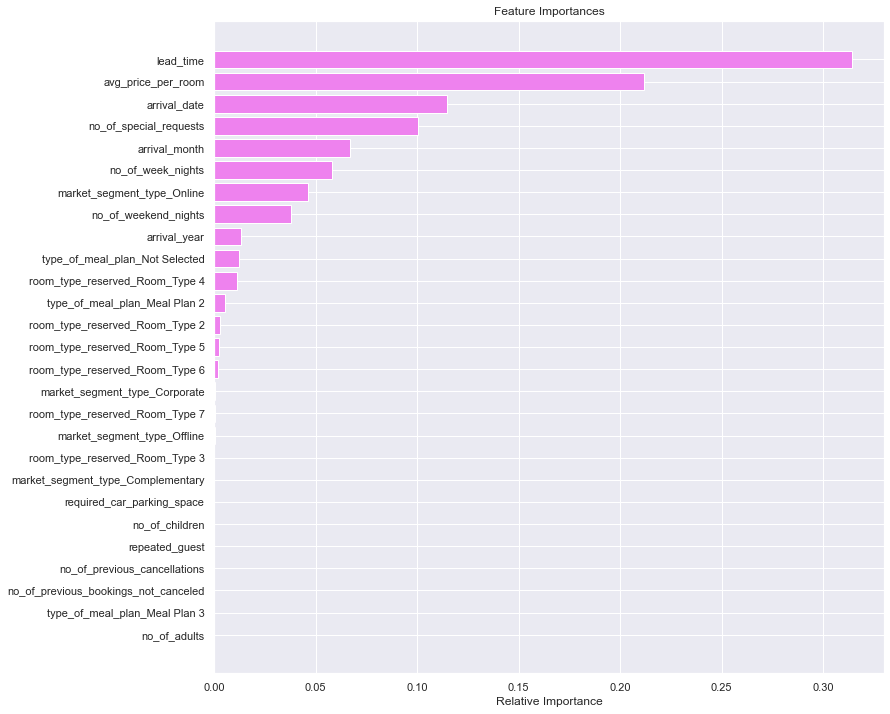

<IPython.core.display.Javascript object>

In [752]:
# Initial feature graph
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [753]:
# Choose the type of classifier.
# I set the splitter to best.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.25, 1: 0.75})

# Grid of parameters to choose from
parameters = {
    "max_depth": [35, 150, 25, None],
    "criterion": ["gini"],
    "splitter": ["best"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.25, 1: 0.75}, max_depth=35,
                       min_impurity_decrease=0.0001, random_state=1)

<IPython.core.display.Javascript object>

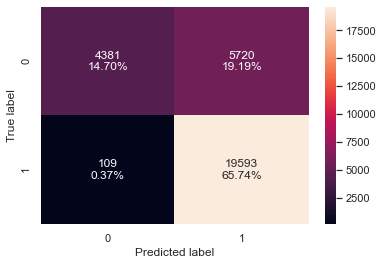

<IPython.core.display.Javascript object>

In [754]:
# 66% true positive isn't strong
confusion_matrix_sklearn(estimator, X_train, y_train)

In [755]:
# 99% recall score is good.
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.994467566744493


<IPython.core.display.Javascript object>

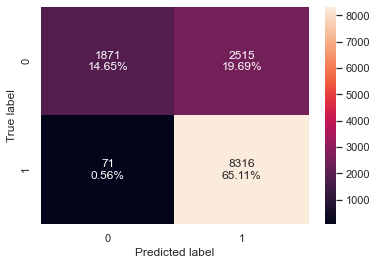

<IPython.core.display.Javascript object>

In [756]:
# Marginal improvement in true positives
confusion_matrix_sklearn(estimator, X_test, y_test)

In [757]:
# Marginal decrease in recall is insignificant
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9915345177059736


<IPython.core.display.Javascript object>

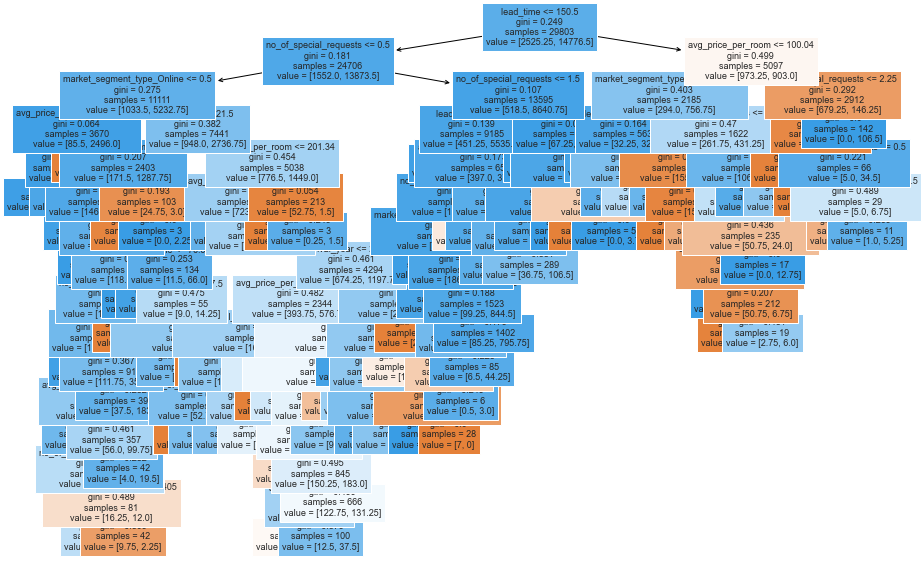

<IPython.core.display.Javascript object>

In [758]:
# This is a Great Learning Script
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [759]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- avg_price_per_room <= 207.90
|   |   |   |   |--- lead_time <= 91.50
|   |   |   |   |   |--- weights: [52.00, 2160.75] class: 1
|   |   |   |   |--- lead_time >  91.50
|   |   |   |   |   |--- weights: [32.00, 335.25] class: 1
|   |   |   |--- avg_price_per_room >  207.90
|   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 21.50
|   |   |   |   |--- avg_price_per_room <= 202.50
|   |   |   |   |   |--- lead_time <= 5.50
|   |   |   |   |   |   |--- weights: [28.00, 682.50] class: 1
|   |   |   |   |   |--- lead_time >  5.50
|   |   |   |   |   |   |--- arrival_month <= 1.50
|   |   |   |   |   |   |   |--- weights: [0.00, 103.50] class: 1
|   |   |   |   |   |   |--- arrival_month >  1.50
|   |   |   |   |   |   |   |--- arrival_month <= 11.50
|   |   |   |   |   |   |   |   |--- 

<IPython.core.display.Javascript object>

In [760]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                           Imp
lead_time                             0.379724
no_of_special_requests                0.213569
avg_price_per_room                    0.212344
market_segment_type_Online            0.098472
arrival_month                         0.056151
arrival_year                          0.014319
no_of_weekend_nights                  0.012450
no_of_week_nights                     0.004030
arrival_date                          0.002451
type_of_meal_plan_Not Selected        0.002230
room_type_reserved_Room_Type 5        0.001867
room_type_reserved_Room_Type 6        0.001308
type_of_meal_plan_Meal Plan 2         0.001083
required_car_parking_space            0.000000
room_type_reserved_Room_Type 4        0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
room_type_res

<IPython.core.display.Javascript object>

In [761]:
df = df.drop(
    [
        "arrival_year",
        "no_of_weekend_nights",
        "no_of_week_nights",
        "arrival_date",
        "type_of_meal_plan_Not Selected",
        "room_type_reserved_Room_Type 5",
        "room_type_reserved_Room_Type 6",
        "type_of_meal_plan_Meal Plan 2",
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

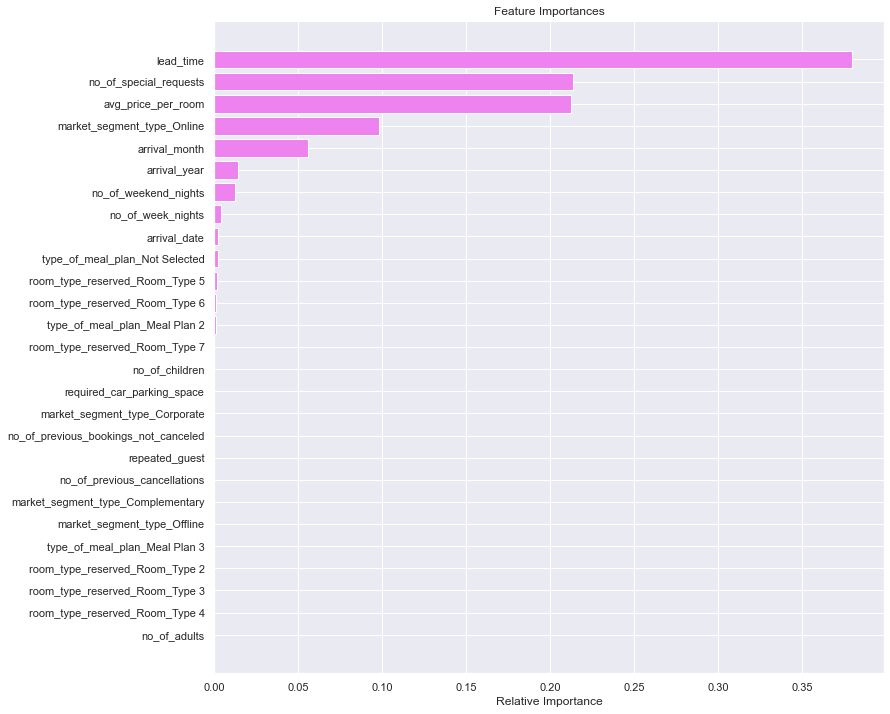

<IPython.core.display.Javascript object>

In [762]:
# Importances of features is too strict,
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [763]:
# cc alphas is a complexity measure
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [764]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.001507
1    -2.371692e-20    0.001507
2     5.471520e-21    0.001507
3     5.471520e-21    0.001507
4     5.471520e-21    0.001507
...            ...         ...
2243  3.162523e-03    0.113252
2244  3.495366e-03    0.116747
2245  8.461703e-03    0.125209
2246  1.179117e-02    0.137000
2247  1.516888e-02    0.152169

[2248 rows x 2 columns]

<IPython.core.display.Javascript object>

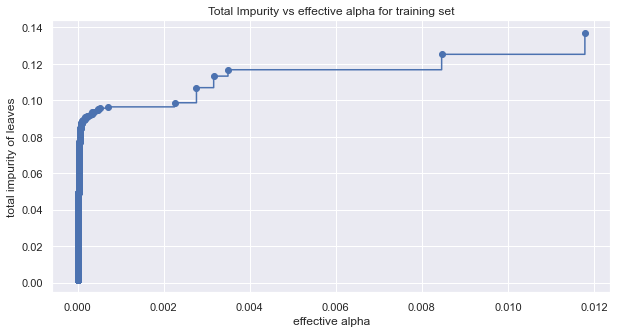

<IPython.core.display.Javascript object>

In [765]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [766]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.01516888189900334


<IPython.core.display.Javascript object>

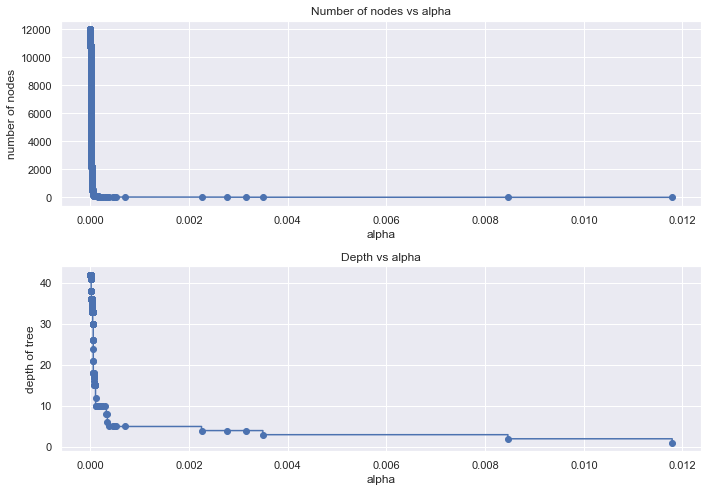

<IPython.core.display.Javascript object>

In [767]:
# This is a measure of complexity versus fitting
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [768]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [769]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [770]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

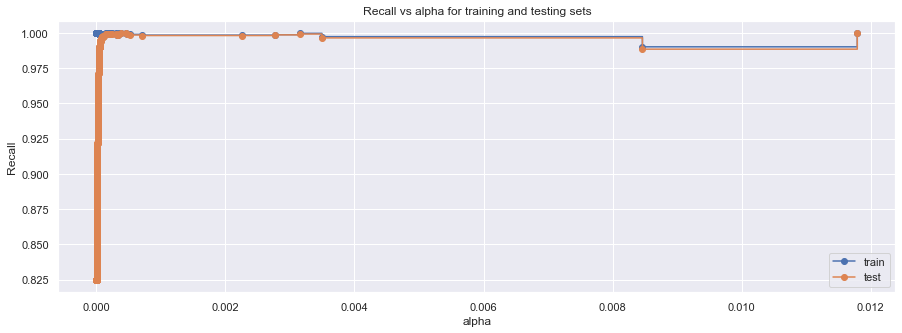

<IPython.core.display.Javascript object>

In [771]:
# quantity vs complexity
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [772]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.01179117040498074,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

In [773]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01179117040498074,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

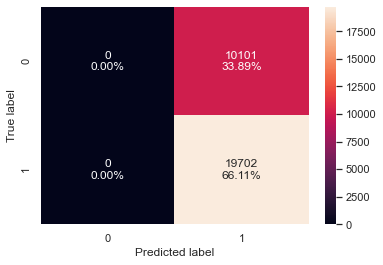

<IPython.core.display.Javascript object>

In [774]:
# previous confusion matrix was 61.5%.
confusion_matrix_sklearn(best_model, X_train, y_train)

In [775]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 1.0


<IPython.core.display.Javascript object>

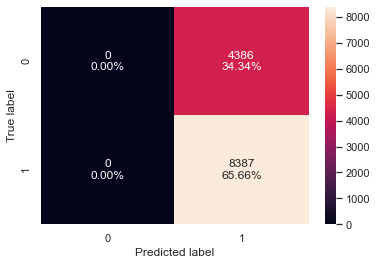

<IPython.core.display.Javascript object>

In [776]:
# On test it is 62.3%
confusion_matrix_sklearn(best_model, X_test, y_test)

In [777]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 1.0


<IPython.core.display.Javascript object>

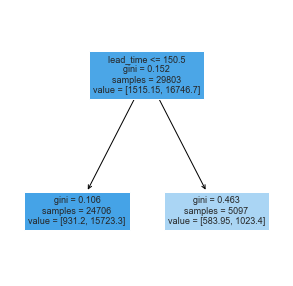

<IPython.core.display.Javascript object>

In [778]:
# This seems to be too restrictive.
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

# Final Model Summary

In [779]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

<IPython.core.display.Javascript object>

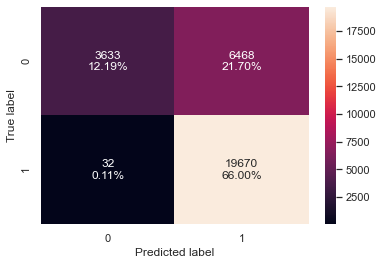

<IPython.core.display.Javascript object>

In [780]:
# 62% true positives on training is not great.
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [781]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9983757994112273


<IPython.core.display.Javascript object>

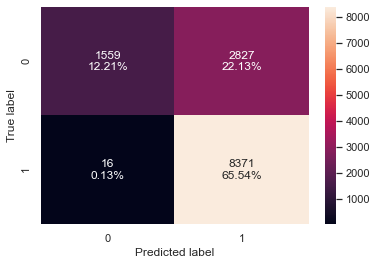

<IPython.core.display.Javascript object>

In [782]:
# Recall score of .99.
# 62% true positive on test.
confusion_matrix_sklearn(best_model2, X_test, y_test)

# Do we need to prune the tree?

In [783]:
# The model was clearly too simplistic.
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9980922856802193


<IPython.core.display.Javascript object>

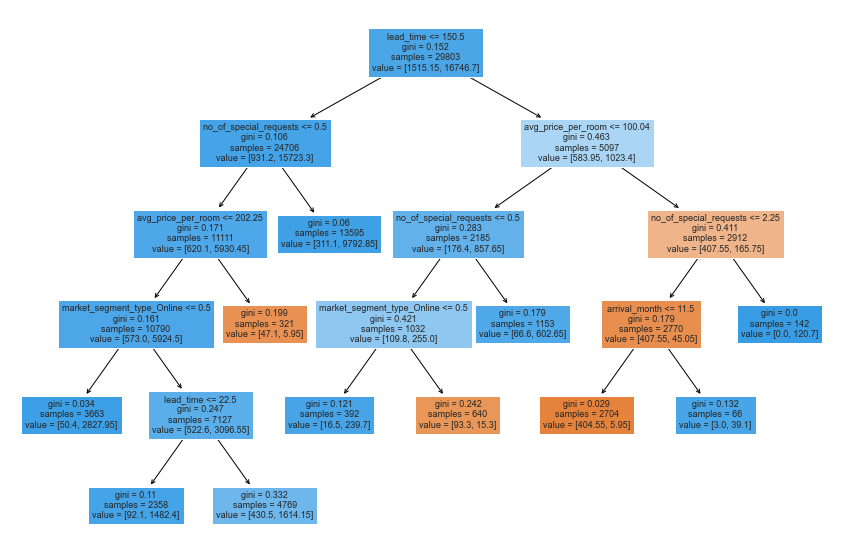

<IPython.core.display.Javascript object>

In [784]:
# model addresses 5 important features. 
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [785]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- avg_price_per_room <= 202.25
|   |   |   |--- market_segment_type_Online <= 0.50
|   |   |   |   |--- weights: [50.40, 2827.95] class: 1
|   |   |   |--- market_segment_type_Online >  0.50
|   |   |   |   |--- lead_time <= 22.50
|   |   |   |   |   |--- weights: [92.10, 1482.40] class: 1
|   |   |   |   |--- lead_time >  22.50
|   |   |   |   |   |--- weights: [430.50, 1614.15] class: 1
|   |   |--- avg_price_per_room >  202.25
|   |   |   |--- weights: [47.10, 5.95] class: 0
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [311.10, 9792.85] class: 1
|--- lead_time >  150.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- market_segment_type_Online <= 0.50
|   |   |   |   |--- weights: [16.50, 239.70] class: 1
|   |   |   |--- market_segment_type_Online >  0.50
|   |   |   |   |--- weights: [93.30, 15.30] class: 0
|   |   |--- no_of_special_reque

<IPython.core.display.Javascript object>

In [786]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.312308
avg_price_per_room                    0.277439
no_of_special_requests                0.202340
market_segment_type_Online            0.145252
arrival_month                         0.062661
required_car_parking_space            0.000000
type_of_meal_plan_Not Selected        0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
no_of_week_nights                     0.000000
type_of_meal_plan_Meal Plan 2         0.000000
no_of_children                        0.000000
no_of_weekend

<IPython.core.display.Javascript object>

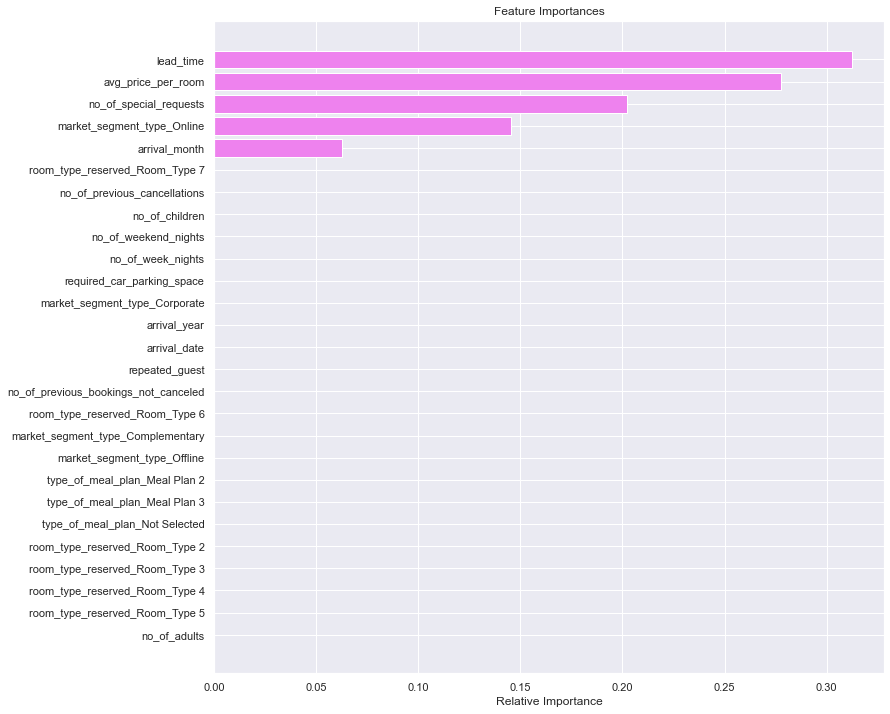

<IPython.core.display.Javascript object>

In [787]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
# no other features are important.

In [788]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Recall on training set
0                1.000000
1                0.994468
2                0.998376

<IPython.core.display.Javascript object>

In [789]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Recall on testing set
0               0.825563
1               0.991535
2               0.998092

<IPython.core.display.Javascript object>

In [790]:
# training and testing recall are similar. Testing is less than training, but still very good.

<IPython.core.display.Javascript object>

# Model Performance Comparison and Conclusions

- The model performs well on training and testing data and indicates there are 5 significant features that determine booking status. 
- Model started with too many features (over-fitting) and was overly complex. It became too restrictive before settling on a 5 feature model that had acceptable level of recall. 


# Actionable Insights and Recommendations
- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

​

Lead time is most significant indicator of keeping reservation. Star hotel should raise prices for bookings that occur more closely to the date of the reservation.
Average price is significant to determine cancellation. 
Special requests also impact likelihood of keeping reservation. More is greater; if there are highly customized requests, the guest is more likely to keep the reservation. 
This should facilitate offering customizations through the online market segment. Online is the next most significant factor in booking status determination. 
Lastly, the arrival month has a minor impact on the probabilty of retaining a reservation. 